# Aim: Simple method to assess your next crypto investment

we are trying to  look at correlation analysis of the cryptocurrency market, using Python, to analyze and visualize how these markets have been evolving in past 6 months, and provide a base framework for deeper analysis. 




1.The correlation and trend between various cryptocurrencies are evaluated to understand:

Which coins can help diversify your portfolio: There is generally a strong correlation between coins, hence it is difficult to diversify risk (Just buying and holding Bitcoin is a safe bet).
Are stable coins actually stable: Generally they appear to be decoupled from altcoin price fluctuations.
<!-- If it is possible to predict the next bull run: Speculative at best. 

2.We have also gathered daily news articles and tweets and other social media feeds related info related to 
bitcoin make a model to make a prediction model for bitcoin based on sentiment analysis of news and twitter related info

3.we will try to analyze sentiments and will try to use different models for a better bitcoin price prediction model

4. we will try to analyze various parameters that can be considered for predicting price or rise and fall of crypto currencies such as bitcoin ,ethereum ,dogecoin etc
Note: Pyviz/seaborn/ is used for most of the visualizations you can find out how to install the library here


------------------------------------------------------------------------------------------------------------------------------

#Data Sources -->>
Data Sources

a.Modified Kaggle dataset to get data related to crypto 

b.and also used coinmarketcap api to collect historical data of past 6 months from jan-2021 to july-2021 for the top 10 cryptocurrencies by marketcap. The data incluedes : date,high,low,open,close,volume,marketcap,name(name of crypto),symbol

Date: refers to the calendar date for the particular row - 24 hours midnight to midnight
Currency: e.g Bitcoin, price in USD at the end of the day

c.collected news and twitts related info from openblender api

d.used lunarcrush api to collect data related to twitts and other social media feeds that could be analyzed for sentiment analysis


#TODO :-------------------------------------------------------------------------------------------------------
Use API from a popular exchange to have up to date set
Add other metrics such as market cap and volume
Add some sort of sentiment analysis based on google tends or twitter feed analysis


1.About data-top 10 crypto data based of market captilization
2.Understanding data & general statistics -for top 10 crypto data 
3.General variation in the crypto price -for top 10 crypto data 
4.Day-to-day percentage change(Daily returns) - for top 10 crypto data 
5. Trend Analysis
6. Daily Returns and Volume
7. Correlation Analysis Of Cryptos with Pair plot and Joint plots
        a.Takeaway
        b.Drawbacks
8. Volatility analysis
9.Monte-Carlo-Analysis
10.Twitter-Sentiments and News Analysis for bitcoins
11.Data Cleaning for tweets sentiment 
12.Models Based on Twitts and news sentiments 
13.Classification model based on news and twitts sentiments
14.EndNotes


In [1]:
# import required libraries
#from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime 
import requests
import csv
import pprint
import requests

                       
#from pytrends.request import TrendReq


#import tweepy
#mport json
#import re
#import os
#import OpenBlender
#from io import StringIO

#import sweetviz 
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import CountVectorizer
#import nltk 
#import string
#import re
#!C:\\Users\\GAURAV\\anaconda3\\python.exe - m pip3 install wordcloud
#from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
#from nltk.tokenize import TweetTokenizer


sns.set()

sns.set_style('whitegrid')

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# This actually makes autocomplete WAY faster ...
%config Completer.use_jedi = False

#import plotly.express as px


# nltk.download([
#     "names",
#     "stopwords",
#     "state_union",
#      "twitter_samples",
#    "movie_reviews",
#    "averaged_perceptron_tagger",
#    "vader_lexicon",
#    "punkt" ])

# Loading the excel file

In [2]:
crypto_df=pd.read_excel("crypto_data.xlsx")

crypto_df




Name Symbol        Date          High           Low          Open  \
0      Bitcoin    BTC  01-01-2021  29600.626950  28803.585010  28994.008920   
1      Bitcoin    BTC  02-01-2021  33155.118820  29091.181190  29376.455830   
2      Bitcoin    BTC  03-01-2021  34608.556740  32052.317080  32129.407360   
3      Bitcoin    BTC  04-01-2021  33440.218570  28722.755270  32810.947640   
4      Bitcoin    BTC  05-01-2021  34437.590590  30221.186740  31977.041130   
...        ...    ...         ...           ...           ...           ...   
1865  USD Coin   USDC  02-07-2021      1.000916      0.999966      1.000177   
1866  USD Coin   USDC  03-07-2021      1.000670      0.999925      1.000048   
1867  USD Coin   USDC  04-07-2021      1.000187      0.998901      0.999956   
1868  USD Coin   USDC  05-07-2021      1.000839      0.999459      0.999565   
1869  USD Coin   USDC  06-07-2021      1.000731      0.999662      1.000501   

             Close        Volume     Marketcap  
0     29374.151890  4.073030e+10  5.460000e+11  
1     32127.267940  6.786542e+10  5.970000e+11  
2     32782.024470  7.866524e+10  6.090000e+11  
3     31971.913520  8.116348e+10  5.940000e+11  
4     33992.429340  6.754732e+10  6.320000e+11  
...            ...           ...           ...  
1865      1.000035  1.787896e+09  2.539775e+10  
1866      0.999984  1.491017e+09  2.550437e+10  
1867      0.999500  1.578667e+09  2.551172e+10  
1868      1.000528  1.887496e+09  2.554724e+10  
1869      1.000059  2.312602e+09  2.567322e+10  

[1870 rows x 9 columns]

# Checking datatypes,missing-values,duplicated-values,general-statitistics 

In [3]:
#DATA DICTIONARY 
#1.shape :--(1870,9)
#2.discription of data 
#3.variable categorization :-numeric,categorical --
#4.redundant columns
#5.missing value analysis
#6.tables utilized for analysis 
#7.discrete and continuos variables

In [4]:
print("shape of data frame :-",crypto_df.shape)

print("*************************************")

print("columns/variables/features in datasets :-\n",list(crypto_df.columns))

print("**************************************")

print("Numerical columns in dataset  :- \n",list(crypto_df.select_dtypes(["int","float"]).columns))

print("**************************************")

print("Categorical columns in dataset  :- \n",list(crypto_df.select_dtypes(["object","category"]).columns))

shape of data frame :- (1870, 9)
*************************************
columns/variables/features in datasets :-
 ['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
**************************************
Numerical columns in dataset  :- 
 ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
**************************************
Categorical columns in dataset  :- 
 ['Name', 'Symbol', 'Date']


In [5]:
crypto_df.dtypes

#date column is object so we have to convert to date 

Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [6]:
crypto_df["Date"] = pd.to_datetime(crypto_df["Date"],format="%d-%m-%Y")
crypto_df.dtypes

#we have changed the date datatype from object to datetime 
#rest all data-types seems to be well

Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [7]:
crypto_df.head(5)

Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   

         Close        Volume     Marketcap  
0  29374.15189  4.073030e+10  5.460000e+11  
1  32127.26794  6.786542e+10  5.970000e+11  
2  32782.02447  7.866524e+10  6.090000e+11  
3  31971.91352  8.116348e+10  5.940000e+11  
4  33992.42934  6.754732e+10  6.320000e+11

In [8]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1870 non-null   object        
 1   Symbol     1870 non-null   object        
 2   Date       1870 non-null   datetime64[ns]
 3   High       1870 non-null   float64       
 4   Low        1870 non-null   float64       
 5   Open       1870 non-null   float64       
 6   Close      1870 non-null   float64       
 7   Volume     1870 non-null   float64       
 8   Marketcap  1870 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 131.6+ KB


In [9]:
crypto_df.isnull().sum()
#no missing values present 

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

<AxesSubplot:>

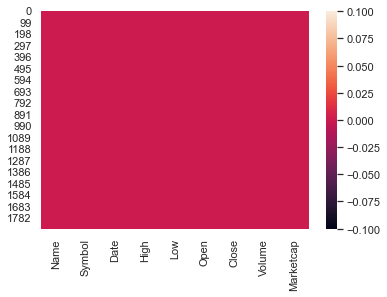

In [10]:
sns.heatmap(crypto_df.isnull())

#visualization to see for missing values 
#there are no missing values present in the dataset


In [11]:
# Count duplicate in a DataFrame

crypto_df.duplicated().sum()

#no duplicate values is present in dataset

0

In [12]:
#general statisitics related to crypto market

crypto_df.describe(include="all")


#Date ranges from :----------->> 1st Jan 2021 to 6th July 2021 

#Name and Symbol variables have 10 unique values related to famous crypto-currencies based on market-captilization from
#the period of 1st Jan 2021 to 6th July 2021 

#maximum value for high variable which represent Highest price on the given day in USD is around 65000 USD(~) which shows how volatile
#crypto market is 

#similarly maximum value for lowest variable which represent Lowest price on given day in USD is also around 62000 USD.

#So,by looking at the general statistics value one can relate and feel about volatility aspects of crypto markets


C:\Users\GAURAV\AppData\Local\Temp/ipykernel_9204/511374591.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crypto_df.describe(include="all")


Name Symbol                 Date          High           Low  \
count      1870   1870                 1870   1870.000000   1870.000000   
unique       10     10                  187           NaN           NaN   
top     Bitcoin    BTC  2021-01-01 00:00:00           NaN           NaN   
freq        187    187                   10           NaN           NaN   
first       NaN    NaN  2021-01-01 00:00:00           NaN           NaN   
last        NaN    NaN  2021-07-06 00:00:00           NaN           NaN   
mean        NaN    NaN                  NaN   4956.252093   4598.007510   
std         NaN    NaN                  NaN  14399.324363  13433.688238   
min         NaN    NaN                  NaN      0.005685      0.004615   
25%         NaN    NaN                  NaN      1.000545      0.999388   
50%         NaN    NaN                  NaN      2.255447      1.891964   
75%         NaN    NaN                  NaN    307.660667    270.075848   
max         NaN    NaN                  NaN  64863.098910  62208.964370   

                Open         Close        Volume     Marketcap  
count    1870.000000   1870.000000  1.870000e+03  1.870000e+03  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
first            NaN           NaN           NaN           NaN  
last             NaN           NaN           NaN           NaN  
mean     4793.415376   4796.938234  2.358528e+10  1.317624e+11  
std     13961.136444  13965.541524  3.876495e+10  2.566356e+11  
min         0.004681      0.005685  2.572255e+07  8.379213e+07  
25%         0.999983      1.000017  1.922830e+09  1.146222e+10  
50%         2.006604      2.018511  4.374596e+09  3.501068e+10  
75%       289.979110    290.372962  3.143834e+10  6.253357e+10  
max     63523.754870  63503.457930  3.510000e+11  1.190000e+12

# Data Wrangling 

## Also, one thing we noticed -- market caps are quite huge. 
## For ease of observing, let's introduce 2 new columns - market_billion_usd,volume_billion _usd which will represent currencies Market Cap in billion USD and Volume in billion USD


In [13]:
crypto_df['market_billion_usd$'] = crypto_df['Marketcap'] / 1000000000
crypto_df['volume_billion_usd$'] = crypto_df['Volume'] / 1000000000


crypto_df.drop(["Volume","Marketcap"],axis=1,inplace=True)

crypto_df.head(10)

Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   
5  Bitcoin    BTC 2021-01-06  36879.69857  33514.03374  34013.61453   
6  Bitcoin    BTC 2021-01-07  40180.36791  36491.18981  36833.87436   
7  Bitcoin    BTC 2021-01-08  41946.73935  36838.63600  39381.76584   
8  Bitcoin    BTC 2021-01-09  41436.35001  38980.87691  40788.64052   
9  Bitcoin    BTC 2021-01-10  41420.19103  35984.62712  40254.21780   

         Close  market_billion_usd$  volume_billion_usd$  
0  29374.15189                546.0            40.730301  
1  32127.26794                597.0            67.865421  
2  32782.02447                609.0            78.665235  
3  31971.91352                594.0            81.163475  
4  33992.42934                632.0            67.547325  
5  36824.36441                685.0            75.289434  
6  39371.04235                732.0            84.762141  
7  40797.61072                759.0            88.107519  
8  40254.54650                749.0            61.984163  
9  38356.43951                713.0            79.980748

In [14]:
crypto_df.Name.unique()

array(['Bitcoin', 'Ethereum', 'Binance Coin', 'Dogecoin', 'Cardano',
       'Polkadot', 'Solana', 'Tether', 'XRP', 'USD Coin'], dtype=object)

# As crypto_df dataset has daily price data related to 10-cryptocurrencies
#so to analyze it in better way lets create subset of data and create dataframes related to each crytptocurrencies 
#to analyze in better way 

In [15]:


bitcoin_df = (crypto_df[crypto_df["Name"]=="Bitcoin"]).reset_index(drop=True)

ethereum_df = (crypto_df[crypto_df["Name"]=="Ethereum"]).reset_index(drop=True)

binance_df = crypto_df[crypto_df["Name"]=="Binance Coin"].reset_index(drop=True)

dogecoin_df = crypto_df[crypto_df["Name"]=="Dogecoin"].reset_index(drop=True)

cardano_df = crypto_df[crypto_df["Name"]=="Cardano"].reset_index(drop=True)

polkadot_df = crypto_df[crypto_df["Name"]=="Polkadot"].reset_index(drop=True)

solana_df = crypto_df[crypto_df["Name"]=="Solana"].reset_index(drop=True)

tether_df = crypto_df[crypto_df["Name"]=="Tether"].reset_index(drop=True)

xrp_df = crypto_df[crypto_df["Name"]=="XRP"].reset_index(drop=True)

usd_df = crypto_df[crypto_df["Name"]=="USD Coin"].reset_index(drop=True)



list_df = [bitcoin_df,ethereum_df,binance_df,dogecoin_df,cardano_df,polkadot_df,solana_df,tether_df,xrp_df,usd_df]

crypto_names=['Bitcoin', 'Ethereum', 'Binance Coin', 'Dogecoin', 'Cardano', 'Polkadot', 'Solana', 'Tether', 'XRP', 'USD Coin']

for data,crypto_name in zip(list_df,crypto_names):
    
    print("************************")
    
    print(f"{crypto_name}---")
    
    data = crypto_df[crypto_df["Name"]==crypto_name]
    
    print("shape of data :--",data.shape)
    
    print("data information :---",data.head(5))
    
    print("**************************")
    

    
    



************************
Bitcoin---
shape of data :-- (187, 9)
data information :---       Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   

         Close  market_billion_usd$  volume_billion_usd$  
0  29374.15189                546.0            40.730301  
1  32127.26794                597.0            67.865421  
2  32782.02447                609.0            78.665235  
3  31971.91352                594.0            81.163475  
4  33992.42934                632.0            67.547325  
**************************
************************
Ethereum---
shape of data :-- (187, 9)
data information :---          Name Symbol 

# univariate analysis

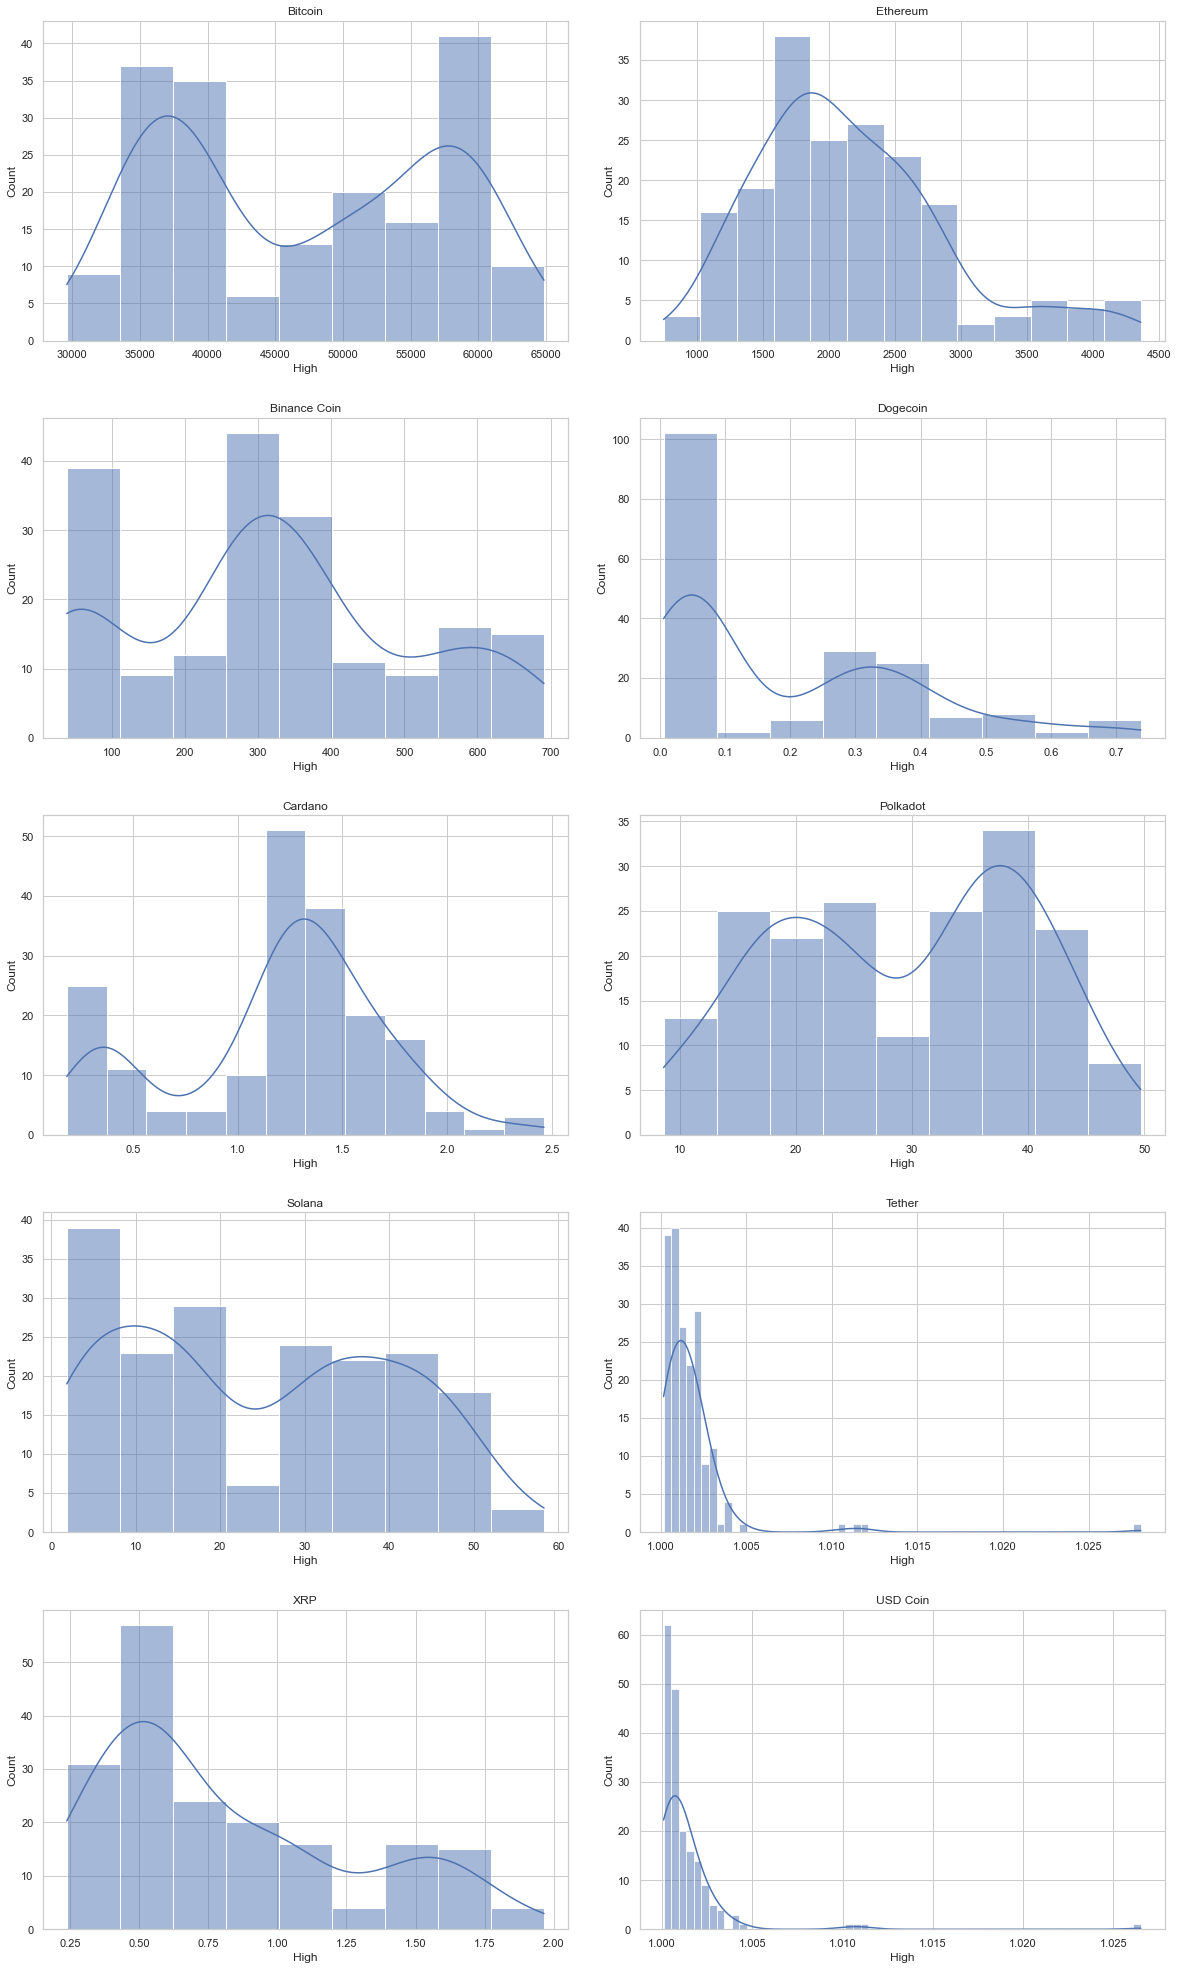

In [16]:
#variable -- High 

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["High"] , ax=subplot,kde=True)
    
    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

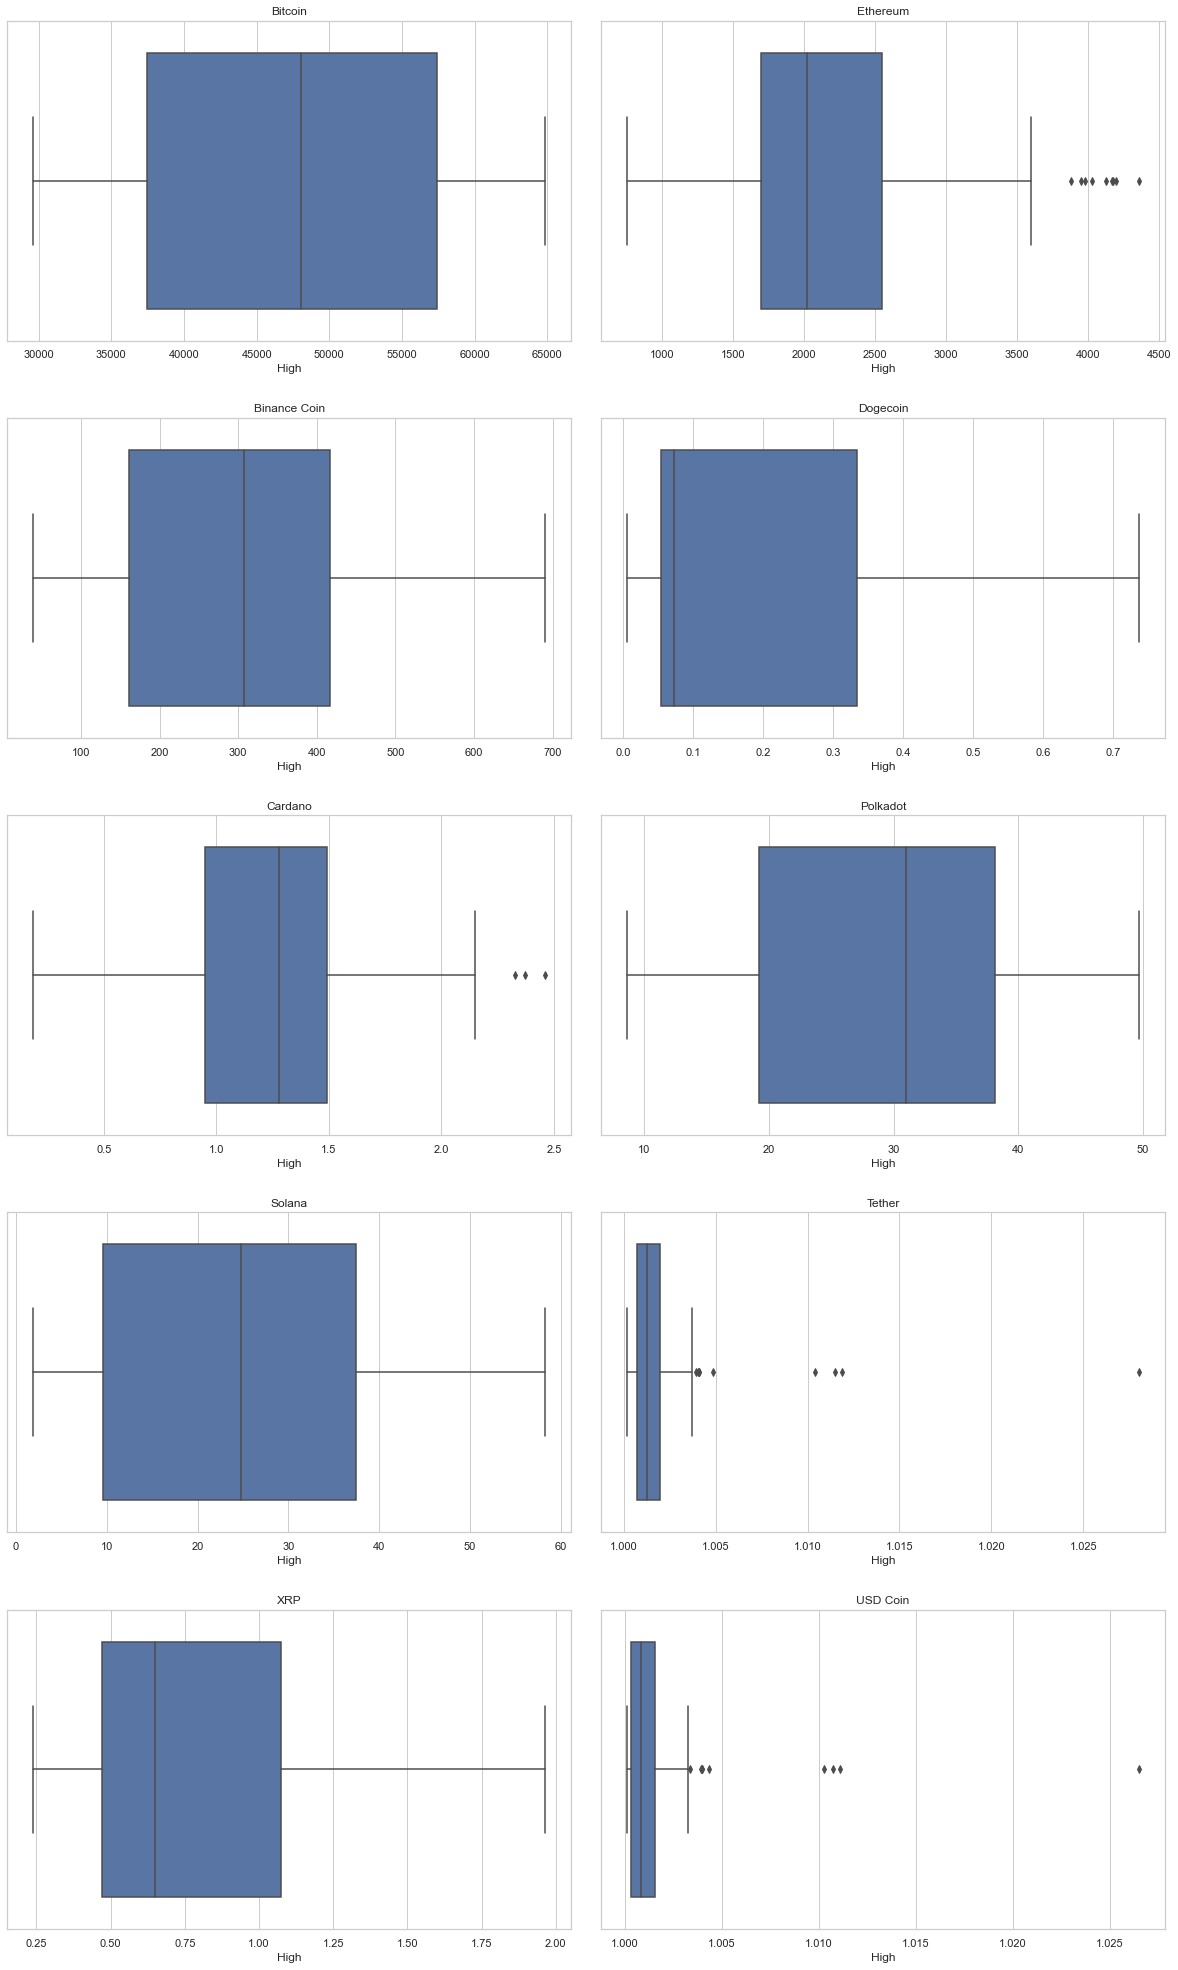

In [17]:

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))

for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    
    sns.boxplot(x=data["High"] , ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

In [18]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable high ")
    print(data["High"].describe())
    print("skewness of high : ",data["High"].skew())
    print("kurtosis of variable high : ",data["High"].kurt())
    print("*************************")

Bitcoin
general statistics for variable high 
count      187.000000
mean     47025.740478
std      10085.512507
min      29600.626950
25%      37474.218440
50%      48047.744590
75%      57383.805560
max      64863.098910
Name: High, dtype: float64
skewness of high :  0.07157372677016421
kurtosis of variable high :  -1.568818756737699
*************************
Ethereum
general statistics for variable high 
count     187.000000
mean     2164.369320
std       727.118695
min       749.201859
25%      1696.479747
50%      2017.759464
75%      2547.461751
max      4362.350542
Name: High, dtype: float64
skewness of high :  0.9037142895468426
kurtosis of variable high :  0.7621141925055839
*************************
Binance Coin
general statistics for variable high 
count    187.000000
mean     314.563011
std      190.171176
min       38.836254
25%      161.595459
50%      307.684855
75%      417.185926
max      690.931965
Name: High, dtype: float64
skewness of high :  0.18200910903373116
kurt

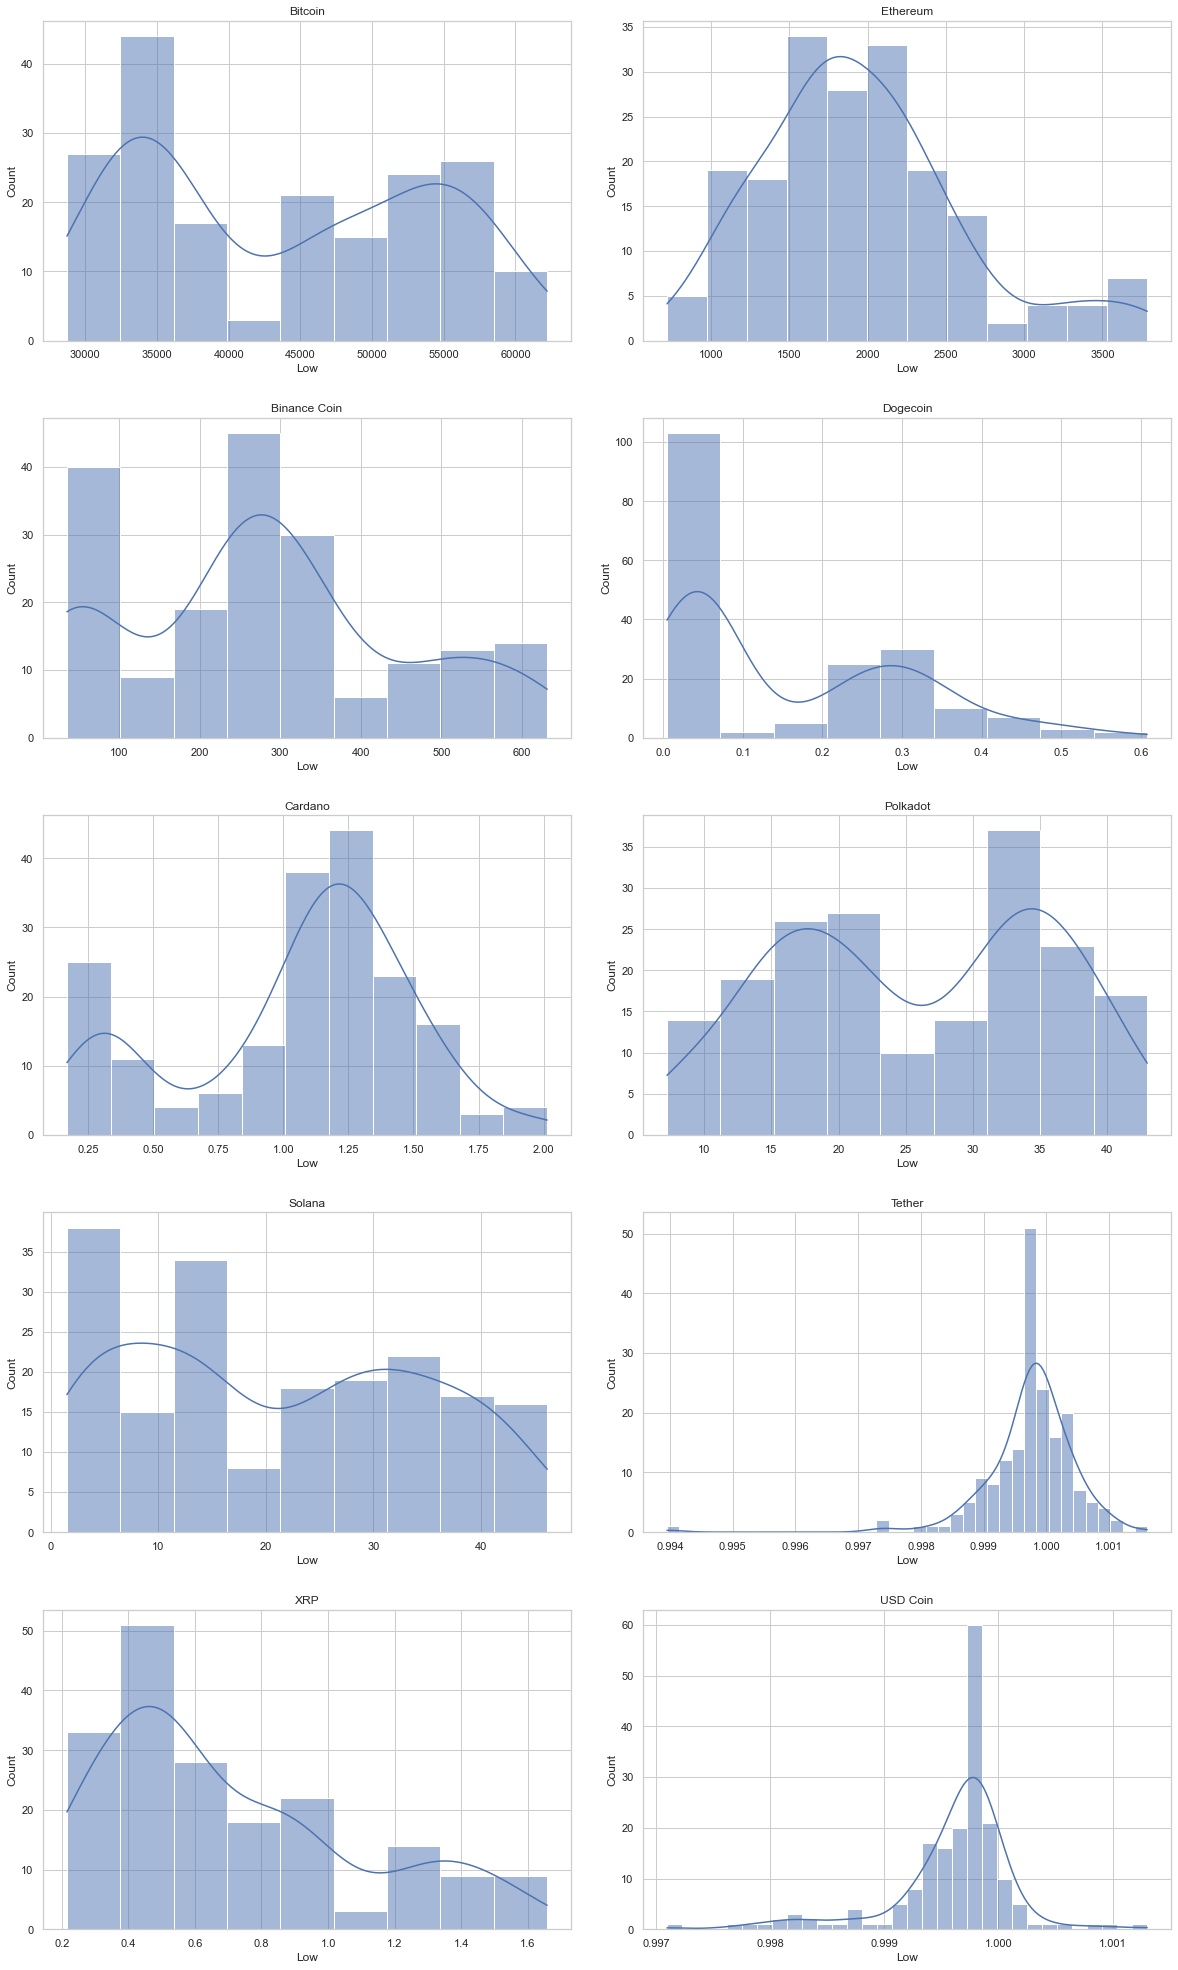

In [19]:

#low -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))

for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Low"] , ax=subplot,kde=True)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    

plt.show()

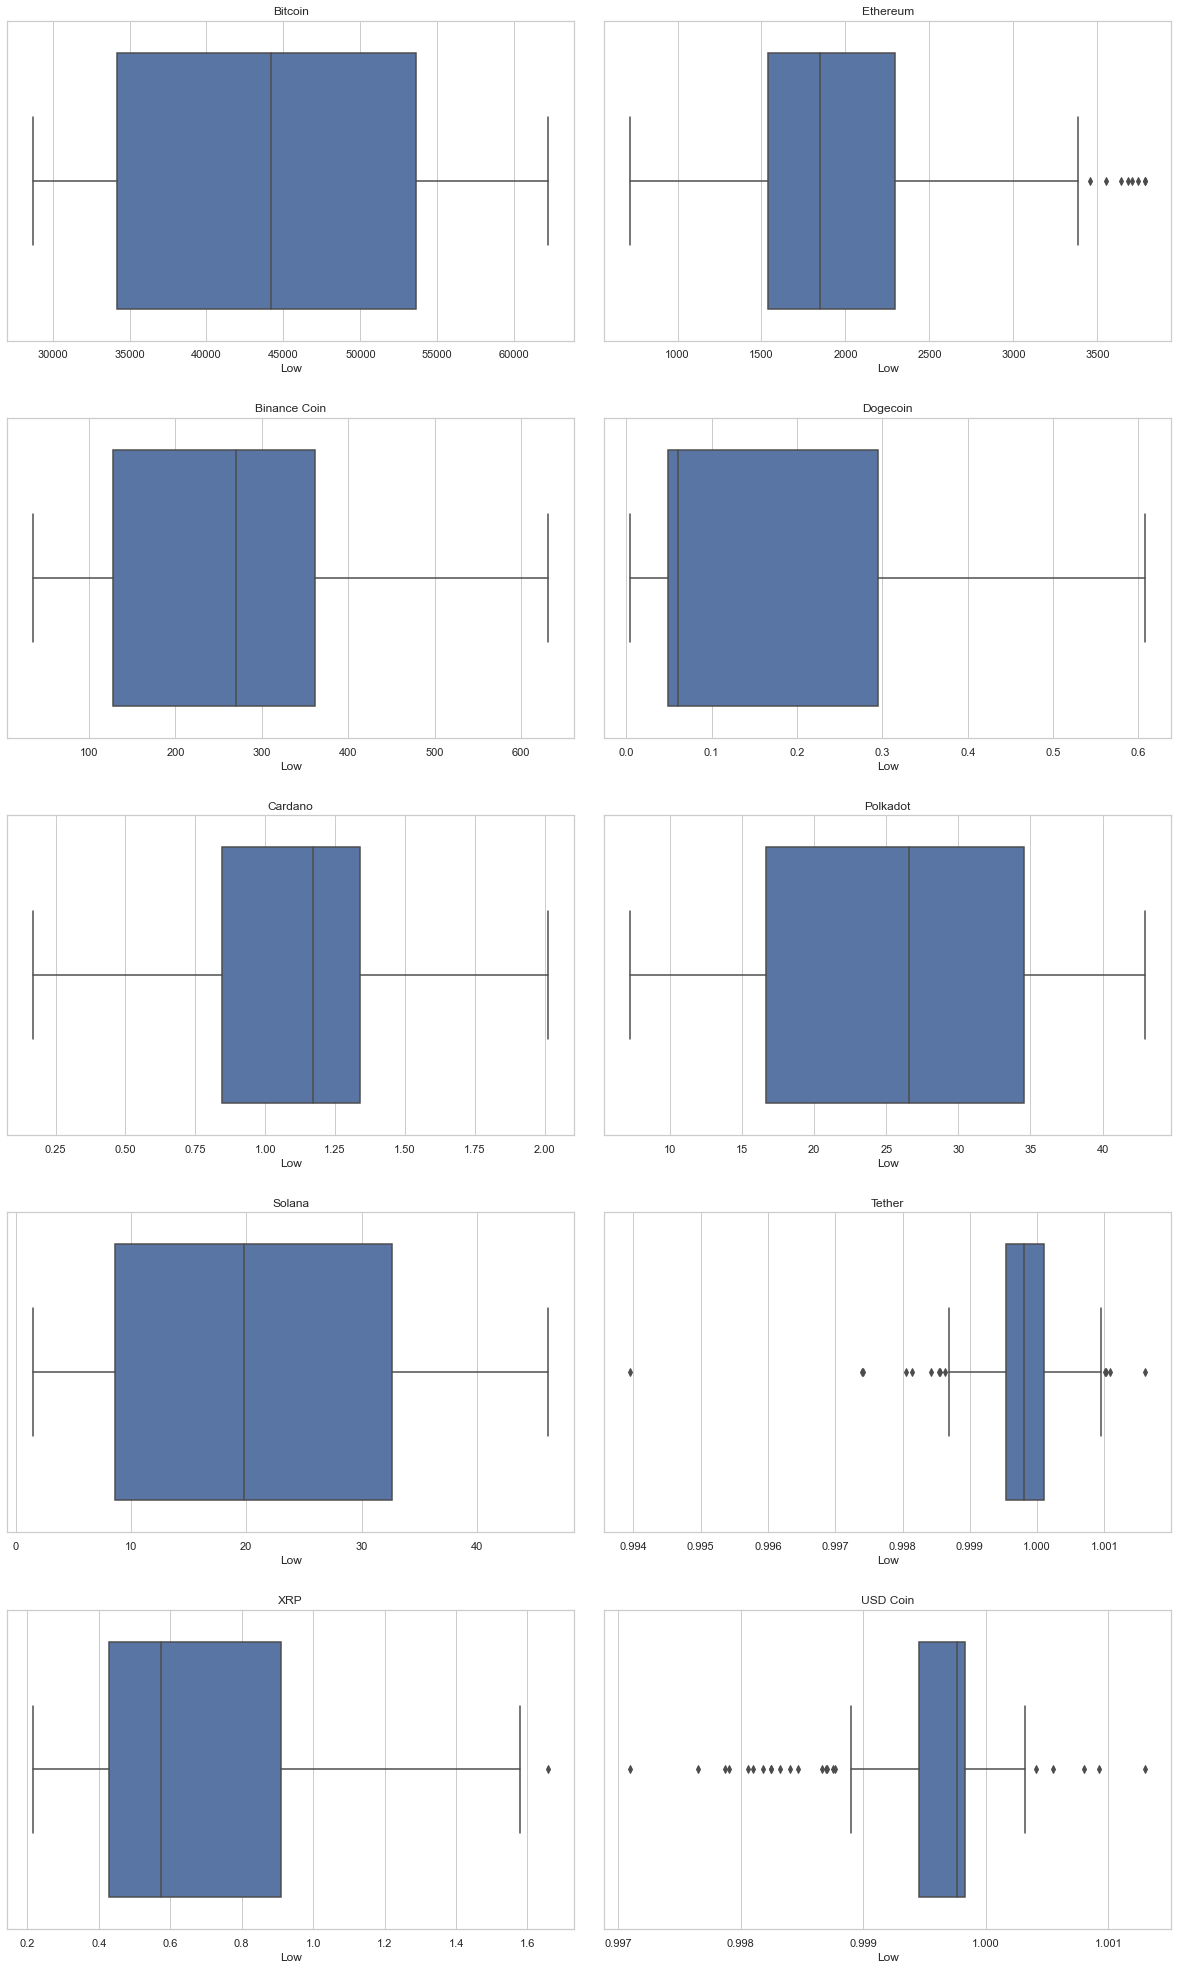

In [20]:

#low -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))

for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Low"] , ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

In [21]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable low ")
    print(data["Low"].describe())
    print("skewness of low : ",data["Low"].skew())
    print("kurtosis of variable low : ",data["Low"].kurt())
    print("*************************")

Bitcoin
general statistics for variable low 
count      187.000000
mean     43692.138739
std      10113.030005
min      28722.755270
25%      34164.047720
50%      44187.762350
75%      53625.249035
max      62208.964370
Name: Low, dtype: float64
skewness of low :  0.1359649500638306
kurtosis of variable low :  -1.5175785702732876
*************************
Ethereum
general statistics for variable low 
count     187.000000
mean     1958.761443
std       647.637568
min       718.109518
25%      1539.755768
50%      1848.206282
75%      2296.439473
max      3785.848603
Name: Low, dtype: float64
skewness of low :  0.7821362773129901
kurtosis of variable low :  0.670968634656905
*************************
Binance Coin
general statistics for variable low 
count    187.000000
mean     278.408045
std      171.308597
min       35.170884
25%      127.911915
50%      270.289902
75%      361.339412
max      631.465298
Name: Low, dtype: float64
skewness of low :  0.27637866753829987
kurtosis of vari

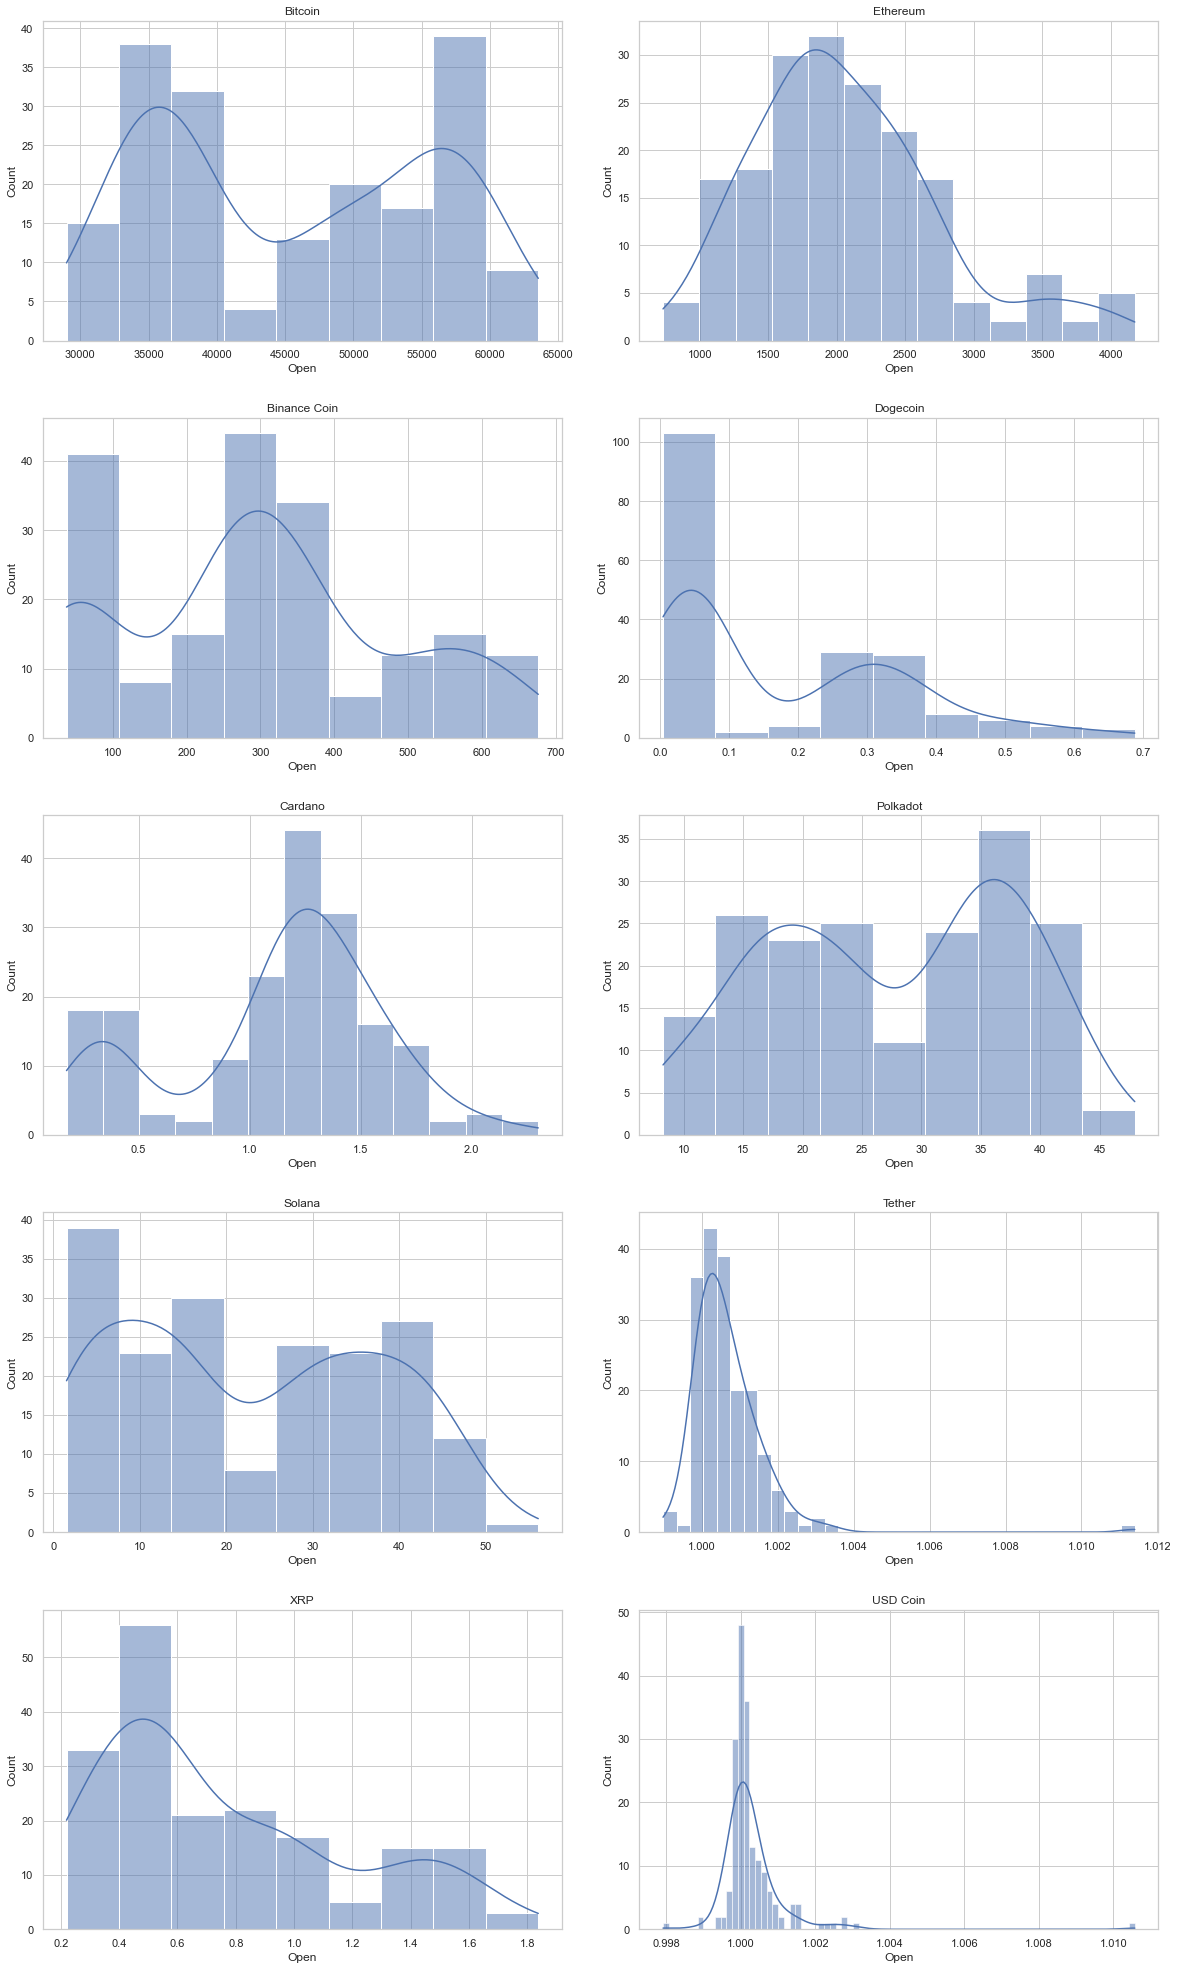

In [22]:

#open -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Open"] , ax=subplot,kde=True)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
    
plt.show()

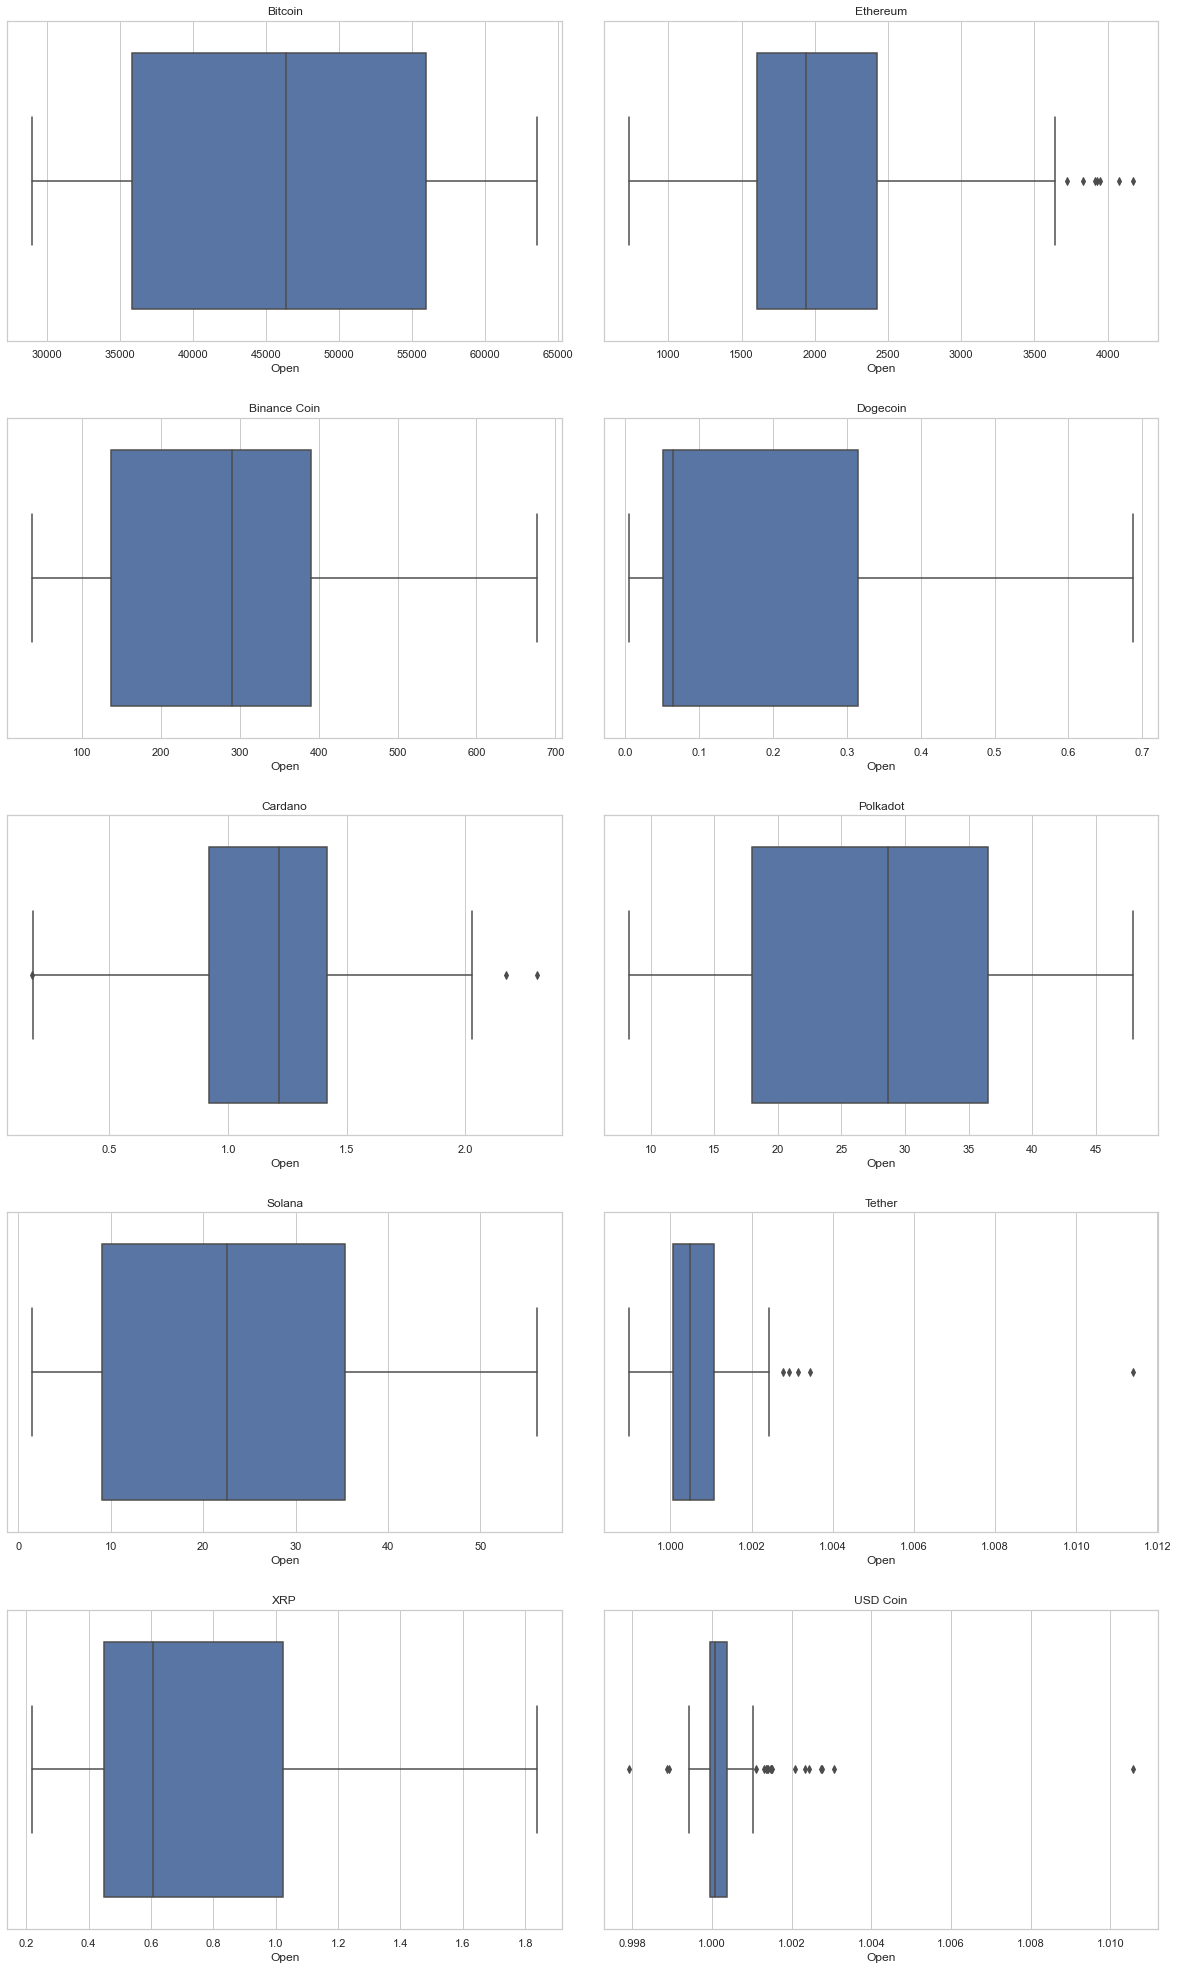

In [23]:

#open -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Open"] , ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

In [24]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable open ")
    print(data["Open"].describe())
    print("skewness of Open : ",data["Open"].skew())
    print("kurtosis of variable Open : ",data["Open"].kurt())
    print("*************************")

Bitcoin
general statistics for variable open 
count      187.000000
mean     45514.300099
std      10098.267357
min      28994.008920
25%      35813.751090
50%      46344.772240
75%      55917.617340
max      63523.754870
Name: Open, dtype: float64
skewness of Open :  0.10126623404360006
kurtosis of variable Open :  -1.5405330811779014
*************************
Ethereum
general statistics for variable open 
count     187.000000
mean     2068.592976
std       692.136754
min       730.402673
25%      1604.426157
50%      1938.859881
75%      2422.024057
max      4174.635873
Name: Open, dtype: float64
skewness of Open :  0.8210168216681503
kurtosis of variable Open :  0.702686916990654
*************************
Binance Coin
general statistics for variable open 
count    187.000000
mean     296.872807
std      181.583921
min       37.374572
25%      136.602386
50%      289.999104
75%      390.597759
max      676.315905
Name: Open, dtype: float64
skewness of Open :  0.21961675134920383
kurt

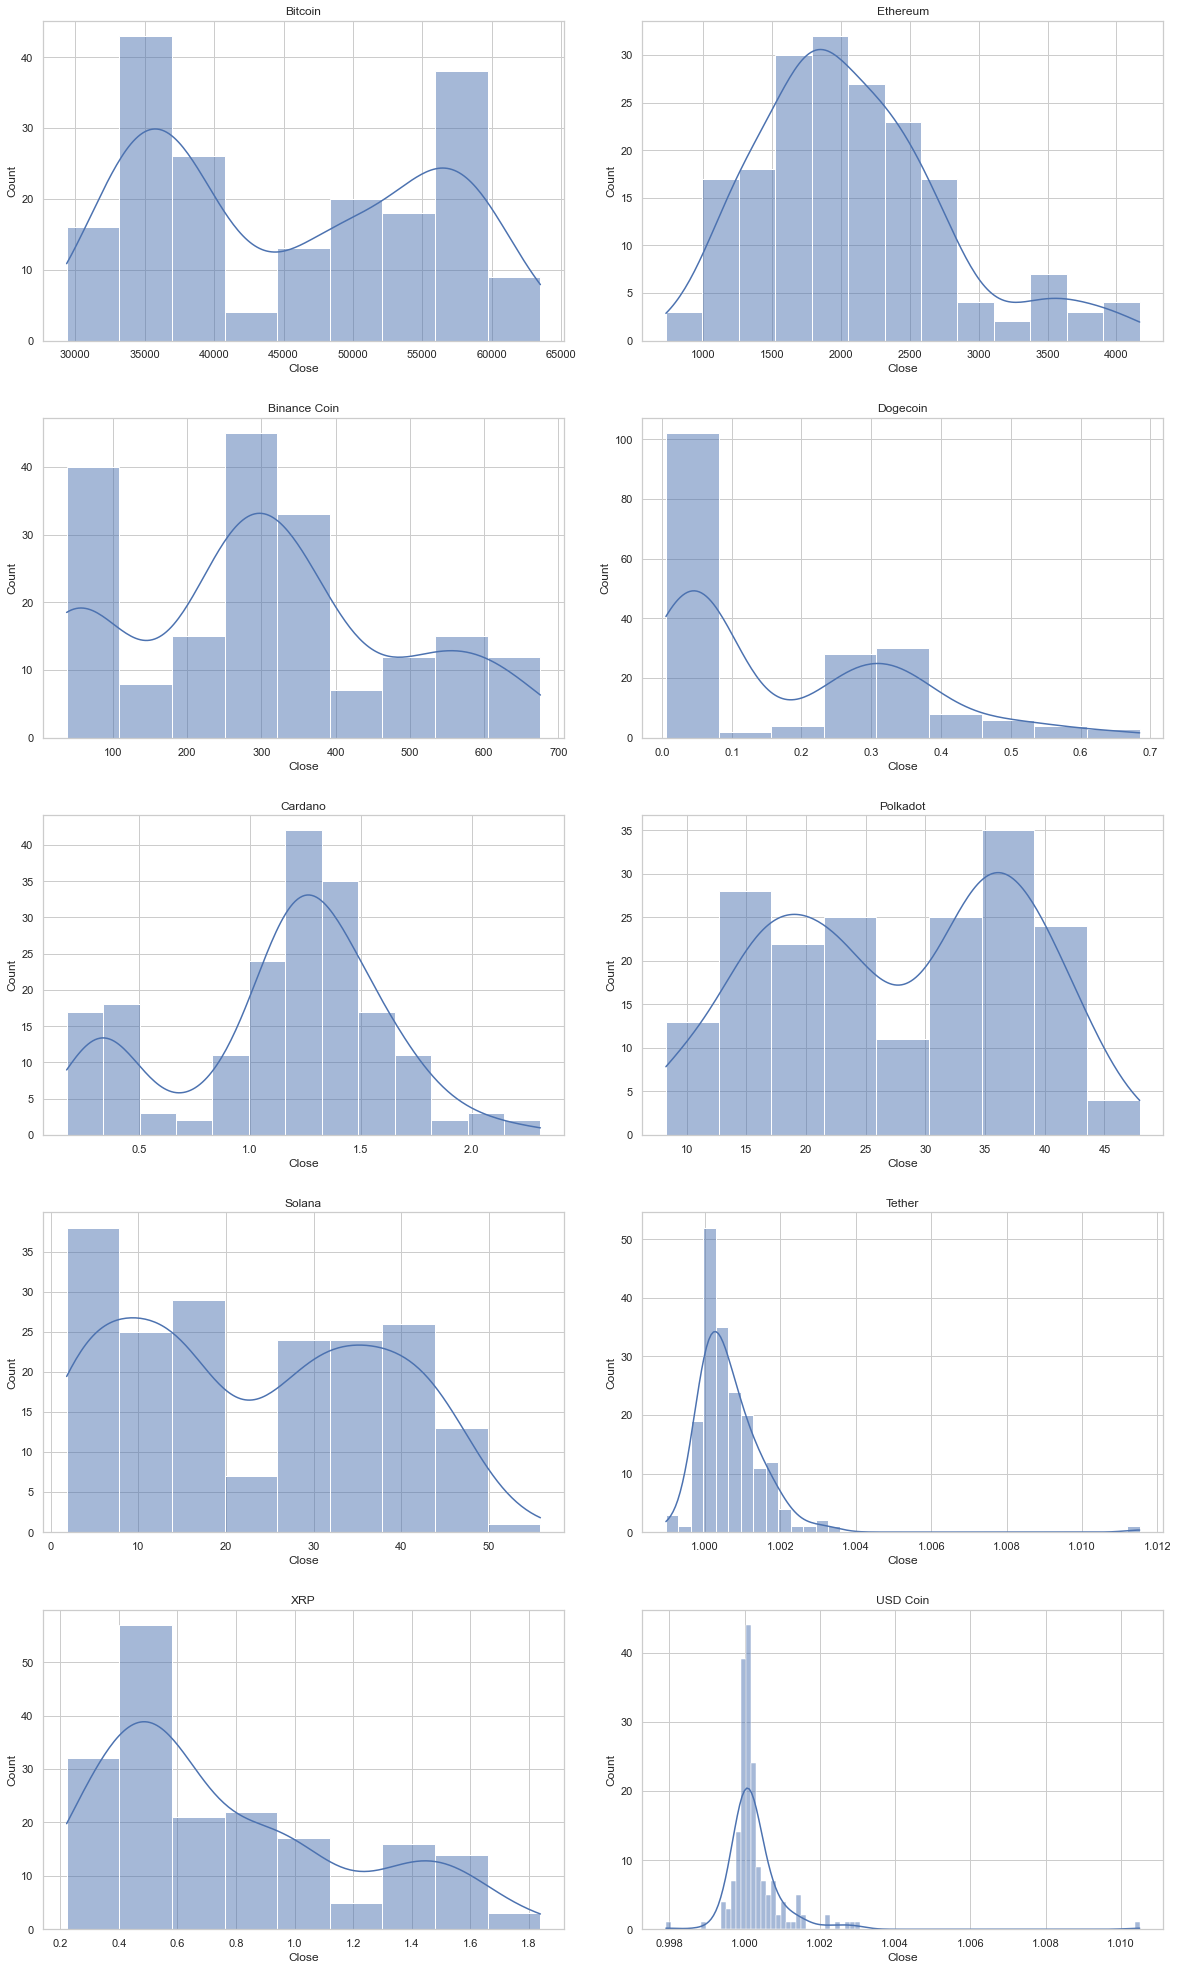

In [25]:

#close -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Close"] , ax=subplot,kde=True)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

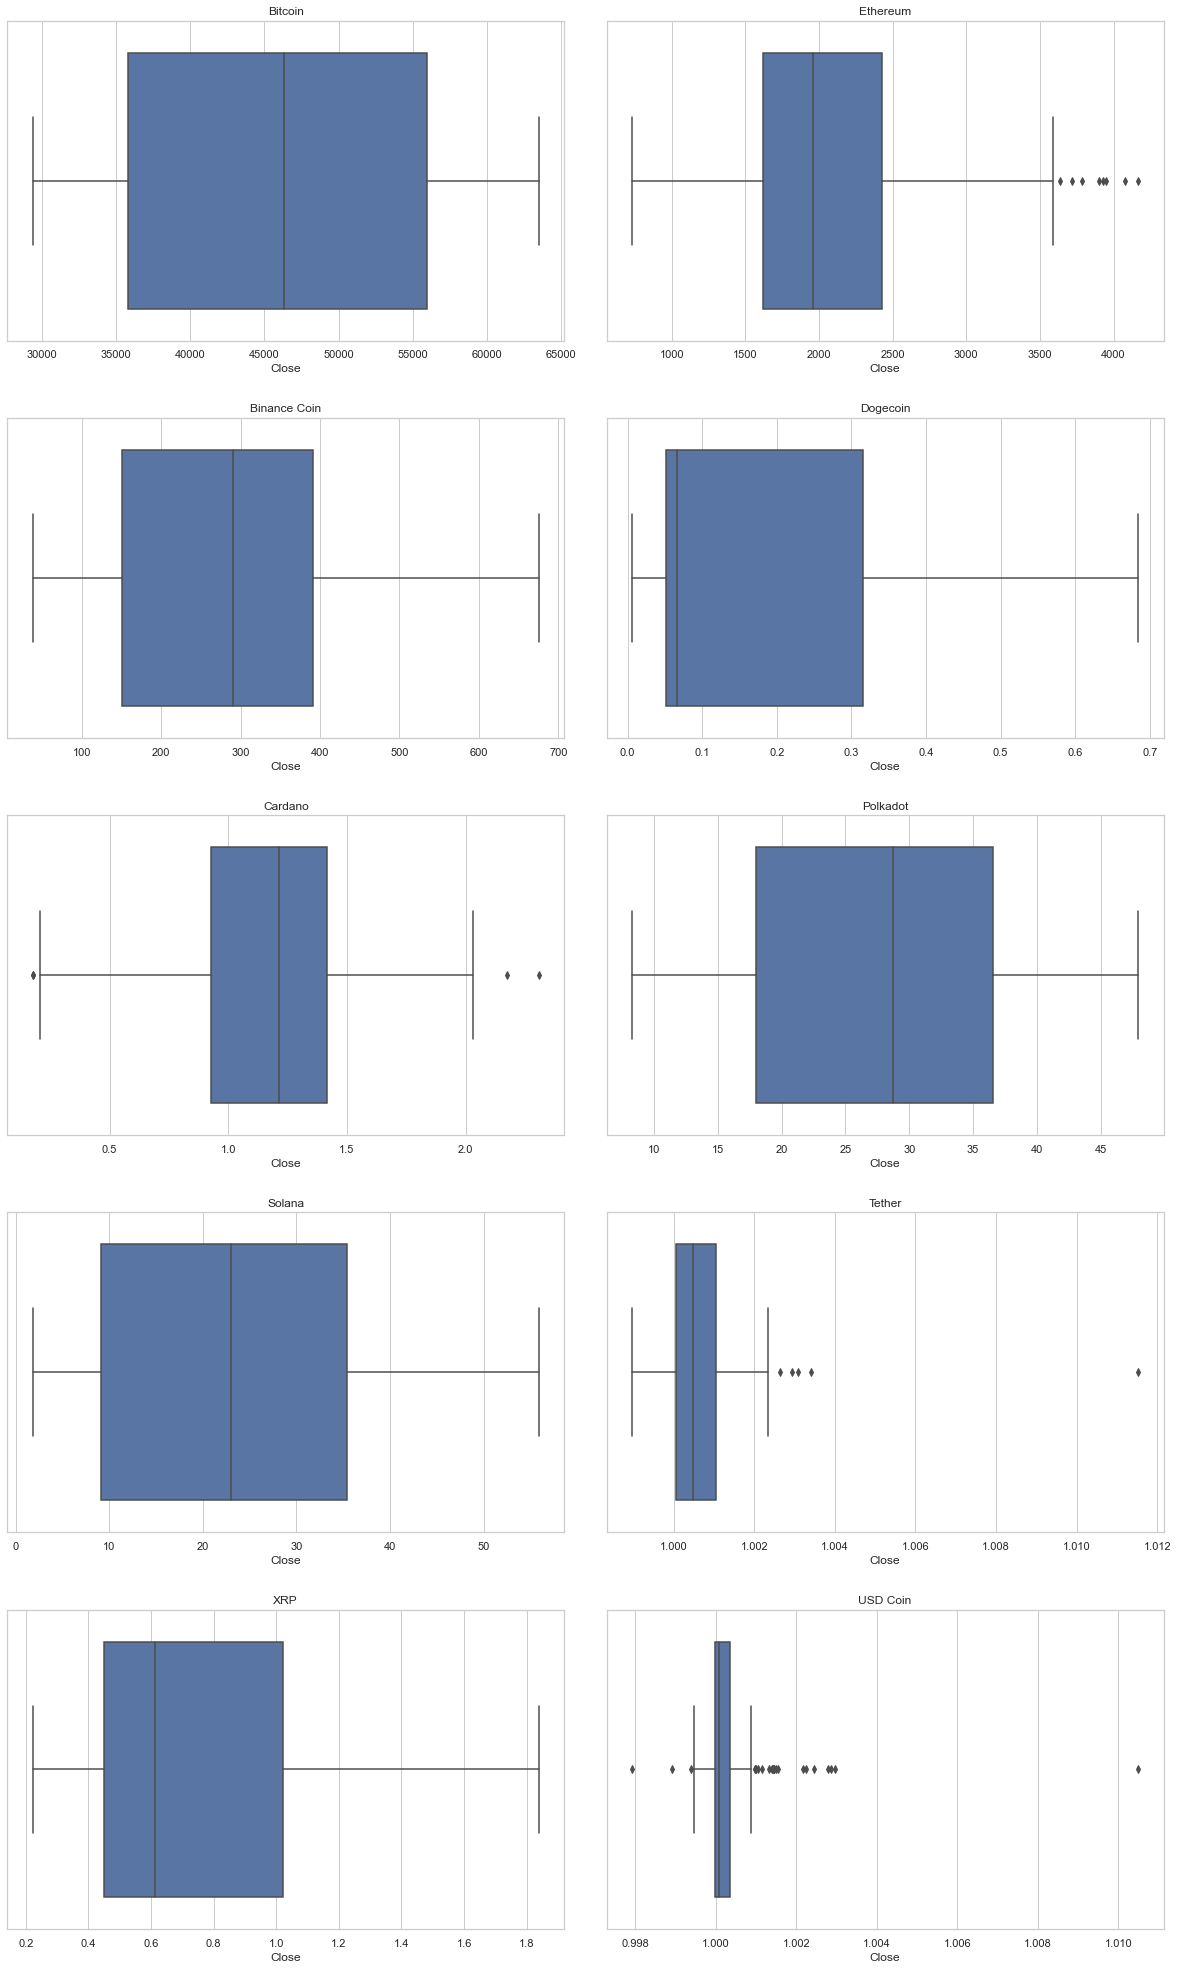

In [26]:

#close -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Close"] , ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

In [27]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable close ")
    print(data["Close"].describe())
    print("skewness of close : ",data["Close"].skew())
    print("kurtosis of variable close : ",data["Close"].kurt())
    print("*************************")

Bitcoin
general statistics for variable close 
count      187.000000
mean     45539.275876
std      10061.708112
min      29374.151890
25%      35789.261350
50%      46339.760080
75%      55928.973000
max      63503.457930
Name: Close, dtype: float64
skewness of close :  0.11032475401821693
kurtosis of variable close :  -1.5490147392473743
*************************
Ethereum
general statistics for variable close 
count     187.000000
mean     2077.092620
std       685.231476
min       730.367569
25%      1620.401764
50%      1960.164744
75%      2425.263837
max      4168.701049
Name: Close, dtype: float64
skewness of close :  0.8415489368114434
kurtosis of variable close :  0.7111472676616111
*************************
Binance Coin
general statistics for variable close 
count    187.000000
mean     298.417514
std      180.598514
min       37.905011
25%      150.809246
50%      290.567020
75%      390.913578
max      675.684077
Name: Close, dtype: float64
skewness of close :  0.2136906803

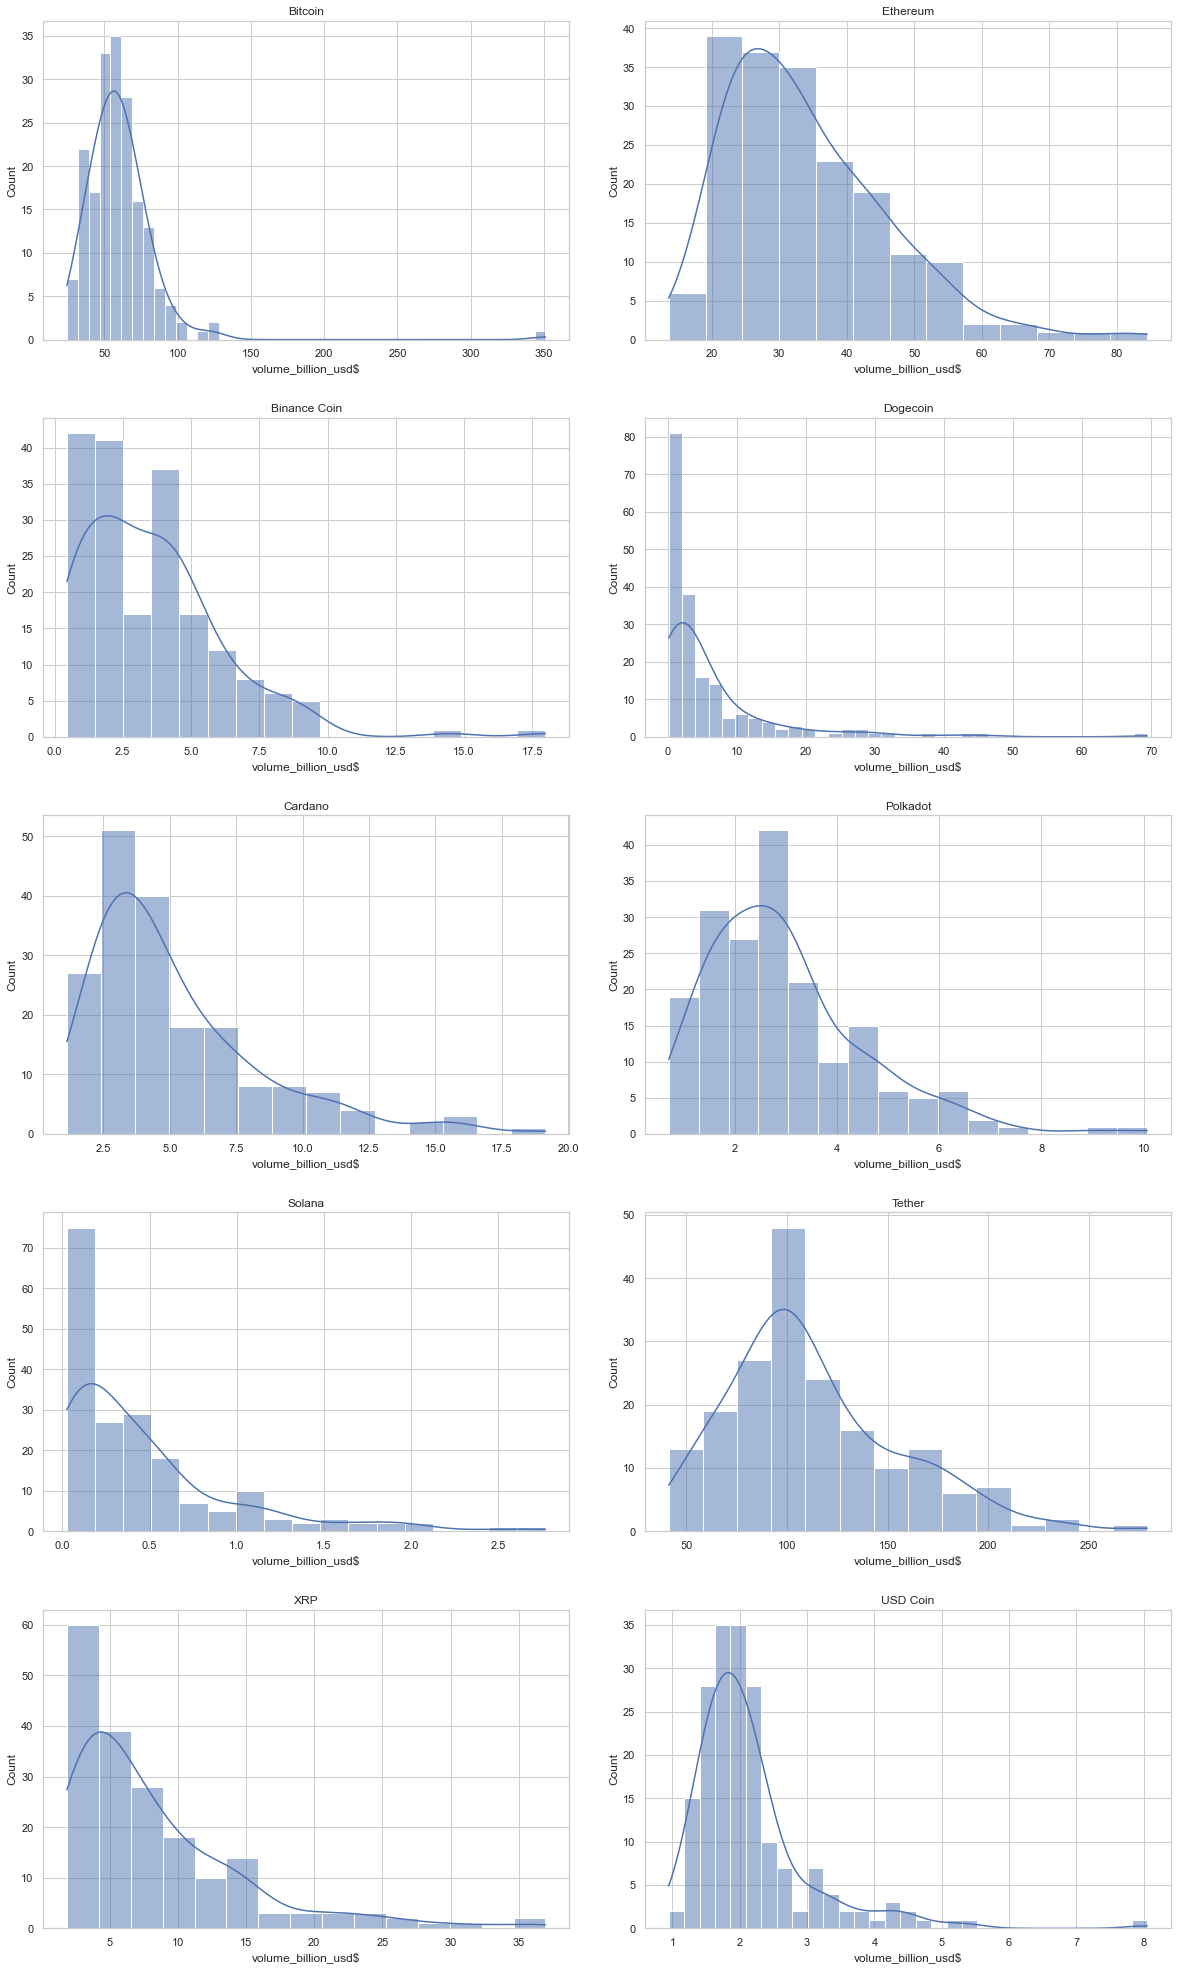

In [28]:

#volume_billion_usd$ -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["volume_billion_usd$"] , ax=subplot,kde=True)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

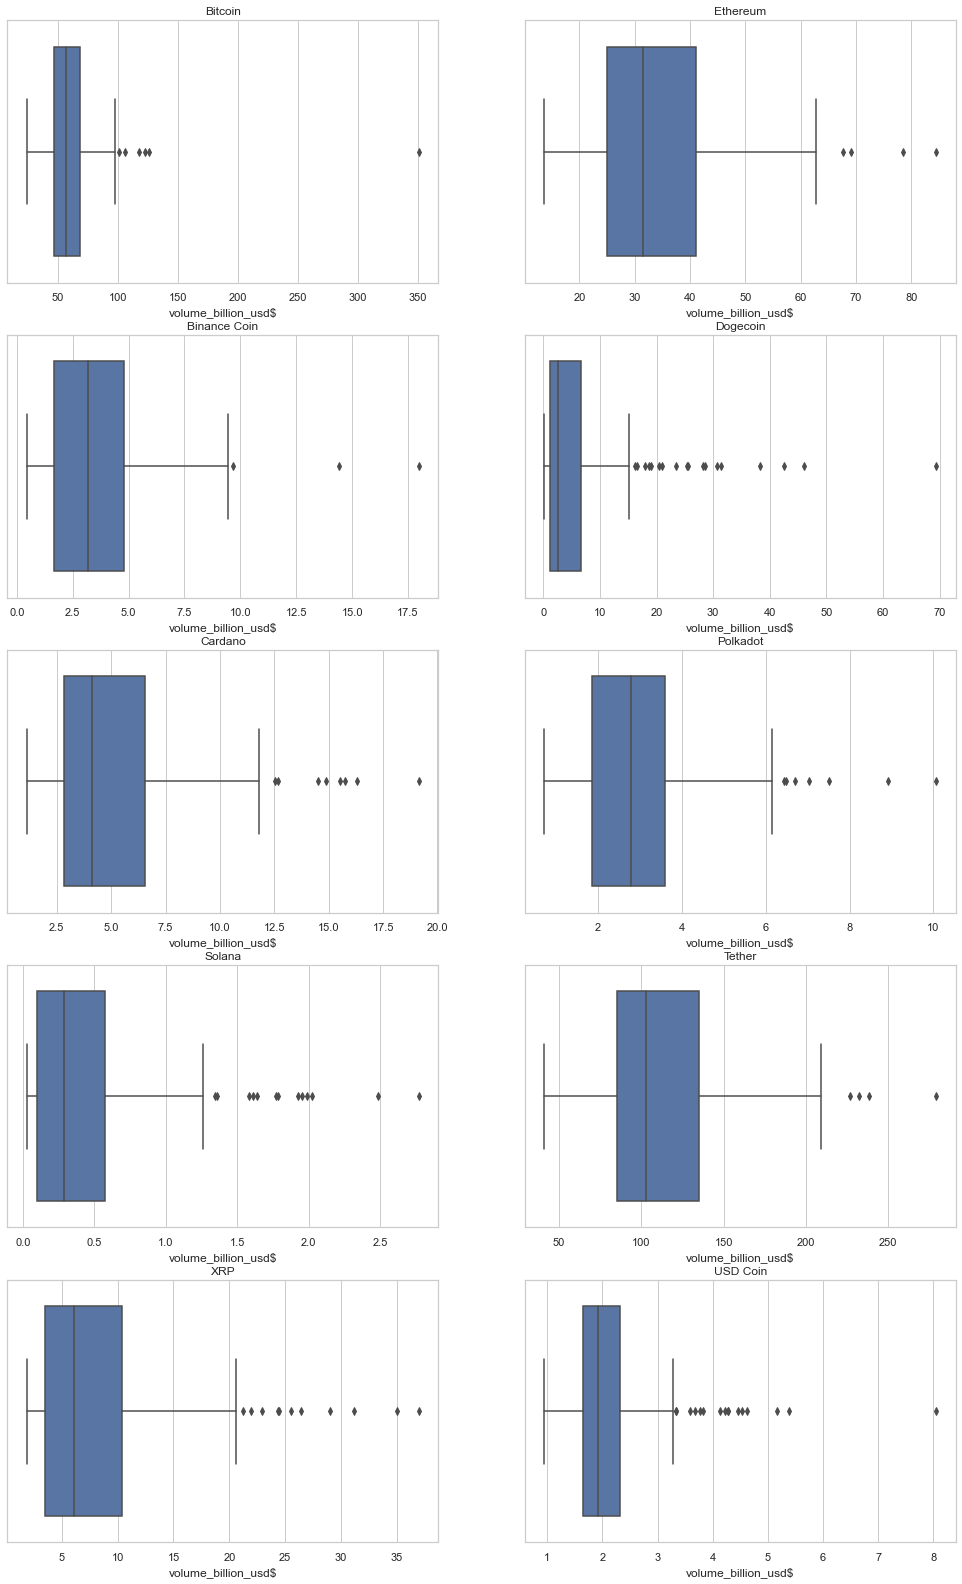

In [29]:

#volume_billion_usd$ -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["volume_billion_usd$"] , ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
    
plt.show()

In [30]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable -volume_billion_usd$ ")
    print(data["volume_billion_usd$"].describe())
    print("skewness of volume : ",data["volume_billion_usd$"].skew())
    print("kurtosis of variable volume: ",data["volume_billion_usd$"].kurt())
    print("*************************")

Bitcoin
general statistics for variable -volume_billion_usd$ 
count    187.000000
mean      60.377120
std       27.923413
min       24.383959
25%       46.960875
50%       57.295578
75%       68.499365
max      351.000000
Name: volume_billion_usd$, dtype: float64
skewness of volume :  6.2763172878184115
kurtosis of variable volume:  62.8381035133575
*************************
Ethereum
general statistics for variable -volume_billion_usd$ 
count    187.000000
mean      34.104041
std       12.068478
min       13.652004
25%       24.909404
50%       31.439115
75%       41.076435
max       84.482913
Name: volume_billion_usd$, dtype: float64
skewness of volume :  1.1832019487147427
kurtosis of variable volume:  1.8505270131065923
*************************
Binance Coin
general statistics for variable -volume_billion_usd$ 
count    187.000000
mean       3.551348
std        2.624837
min        0.450486
25%        1.672357
50%        3.170294
75%        4.783315
max       17.982945
Name: volume_b

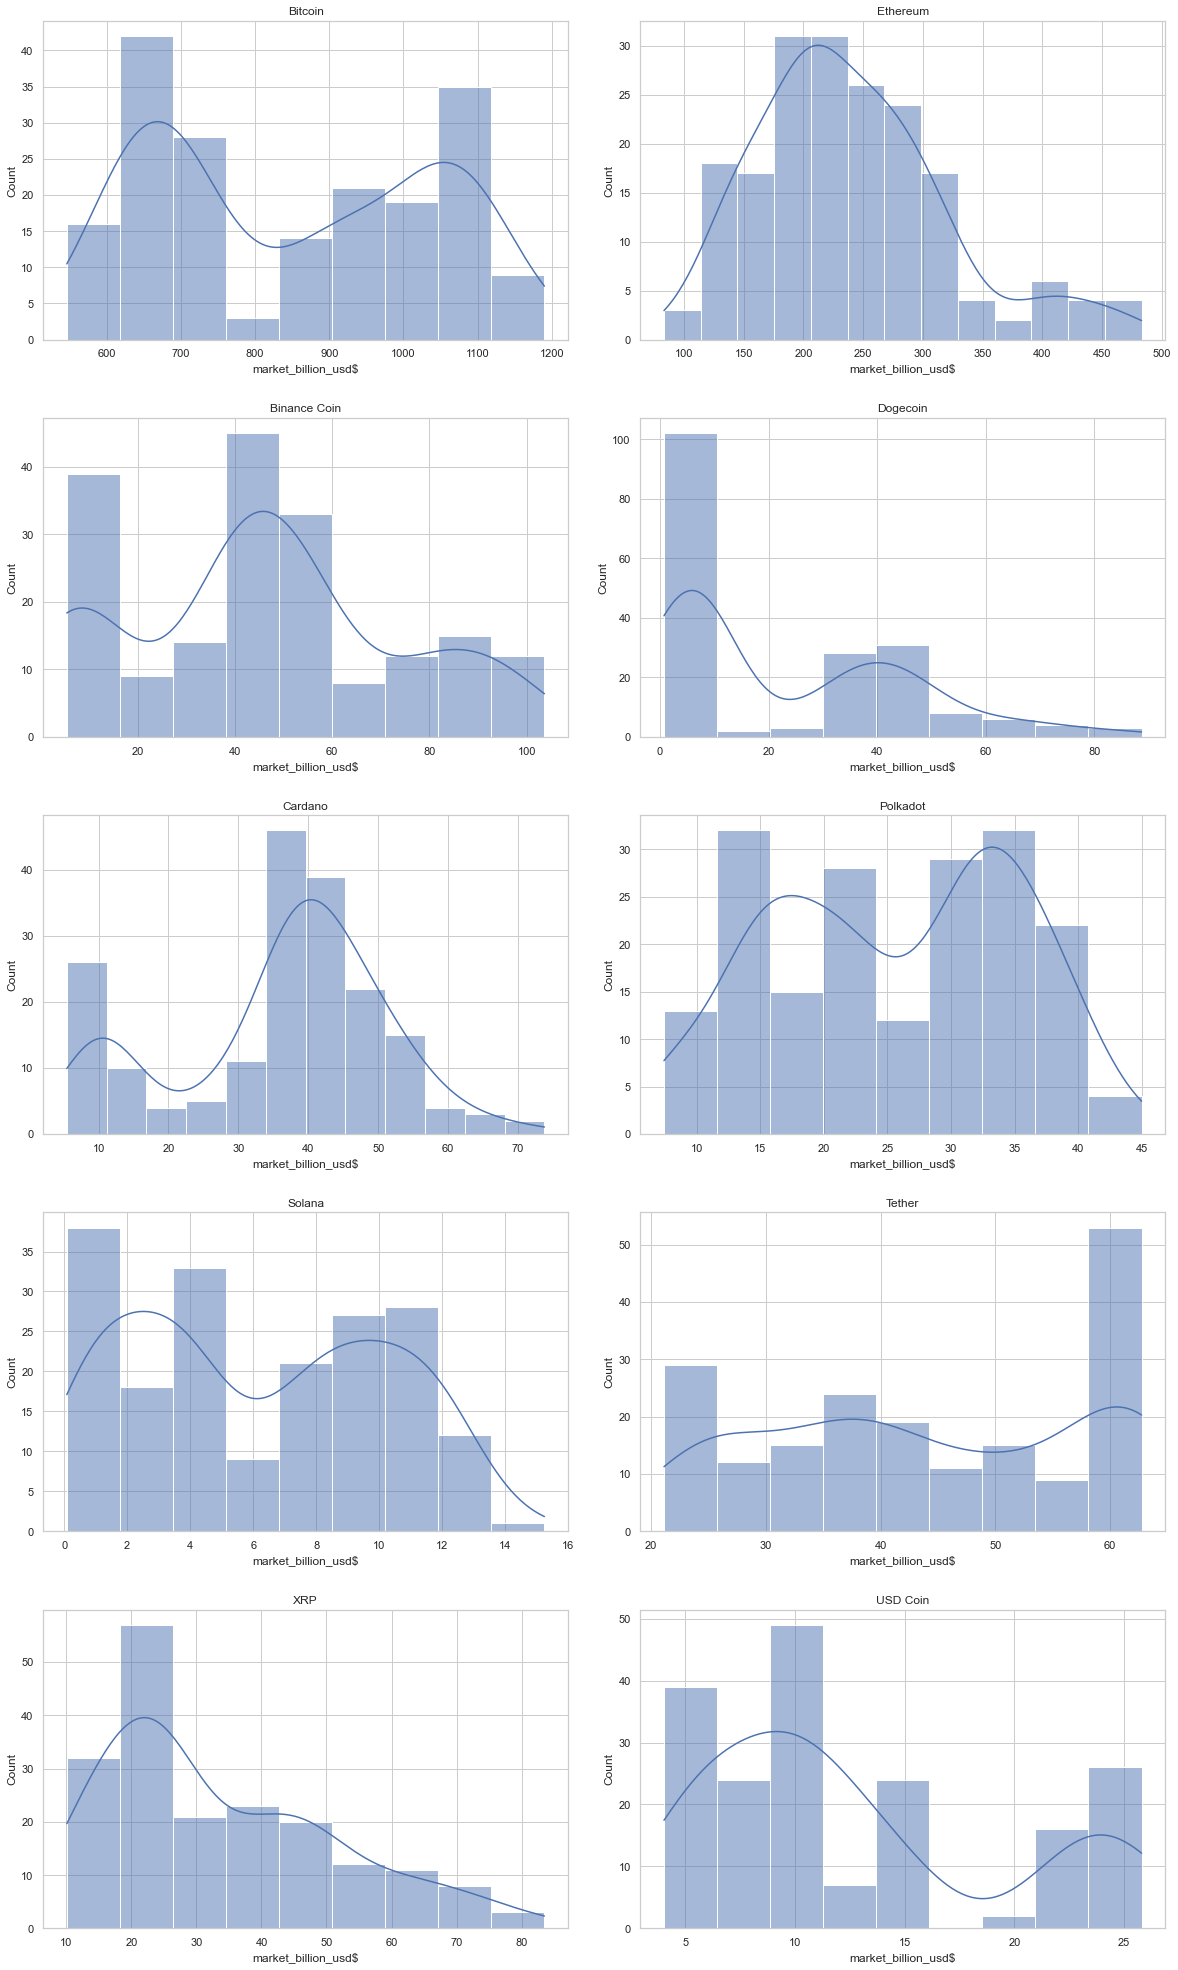

In [31]:

#Marketcap -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["market_billion_usd$"] , ax=subplot,kde=True)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
plt.show()

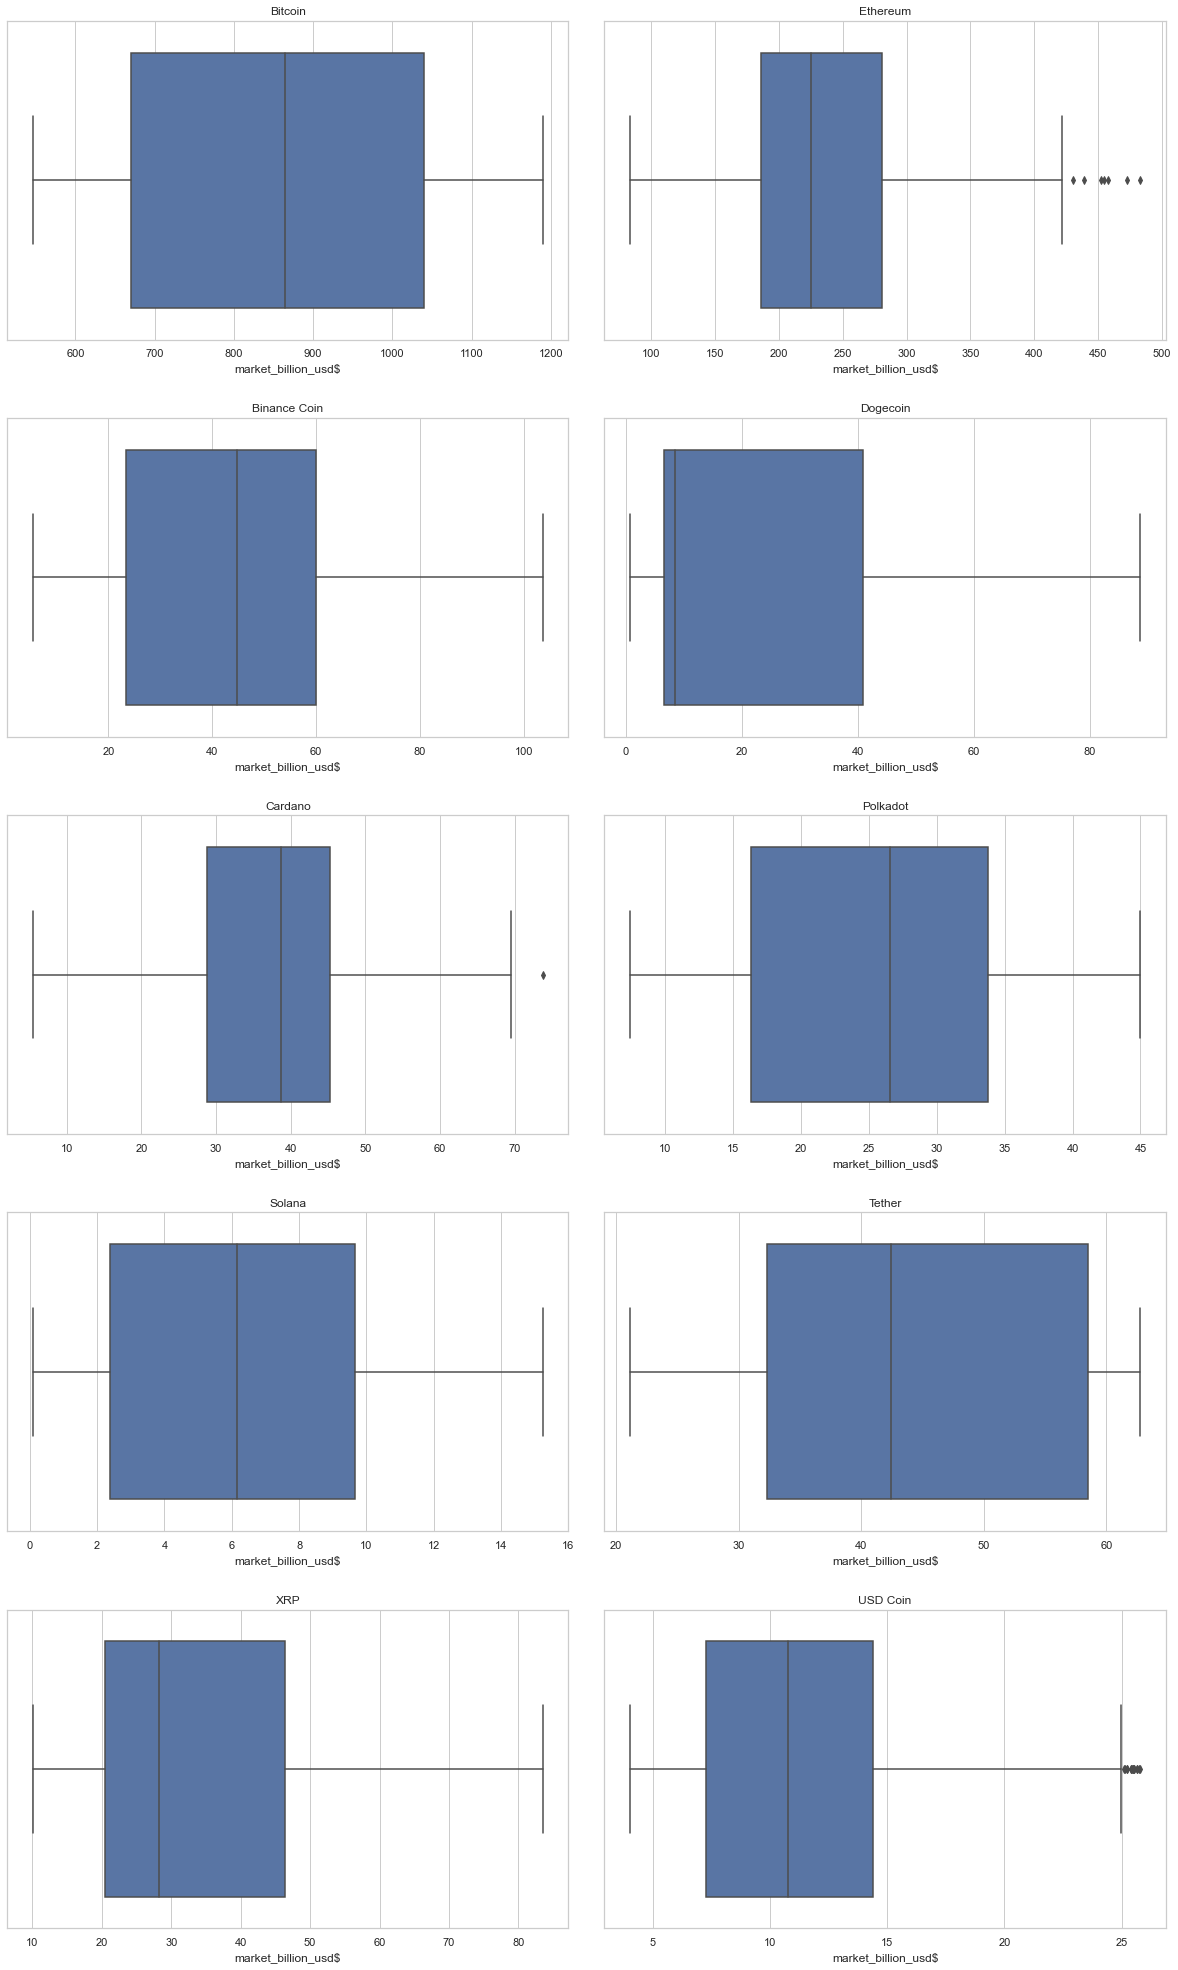

In [32]:

#Marketcap -variable

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(17, 28))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["market_billion_usd$"] , ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
    plt.tight_layout(pad=3)
    
    
plt.show()

In [33]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable Marketcap-market_billion_usd$ ")
    print(data["market_billion_usd$"].describe())
    print("skewness of volume : ",data["market_billion_usd$"].skew())
    print("kurtosis of variable volume: ",data["market_billion_usd$"].kurt())
    print("*************************")

Bitcoin
general statistics for variable Marketcap-market_billion_usd$ 
count     187.000000
mean      850.203209
std       187.783252
min       546.000000
25%       670.000000
50%       864.000000
75%      1040.000000
max      1190.000000
Name: market_billion_usd$, dtype: float64
skewness of volume :  0.11220844329316947
kurtosis of variable volume:  -1.5423600818509995
*************************
Ethereum
general statistics for variable Marketcap-market_billion_usd$ 
count    187.000000
mean     239.910878
std       80.085569
min       83.318540
25%      185.849500
50%      224.910000
75%      280.874000
max      482.882000
Name: market_billion_usd$, dtype: float64
skewness of volume :  0.8218867683057723
kurtosis of variable volume:  0.6492262332638195
*************************
Binance Coin
general statistics for variable Marketcap-market_billion_usd$ 
count    187.000000
mean      45.863429
std       27.772866
min        5.427343
25%       23.304973
50%       44.782178
75%       59.97

# #bivariate analysis



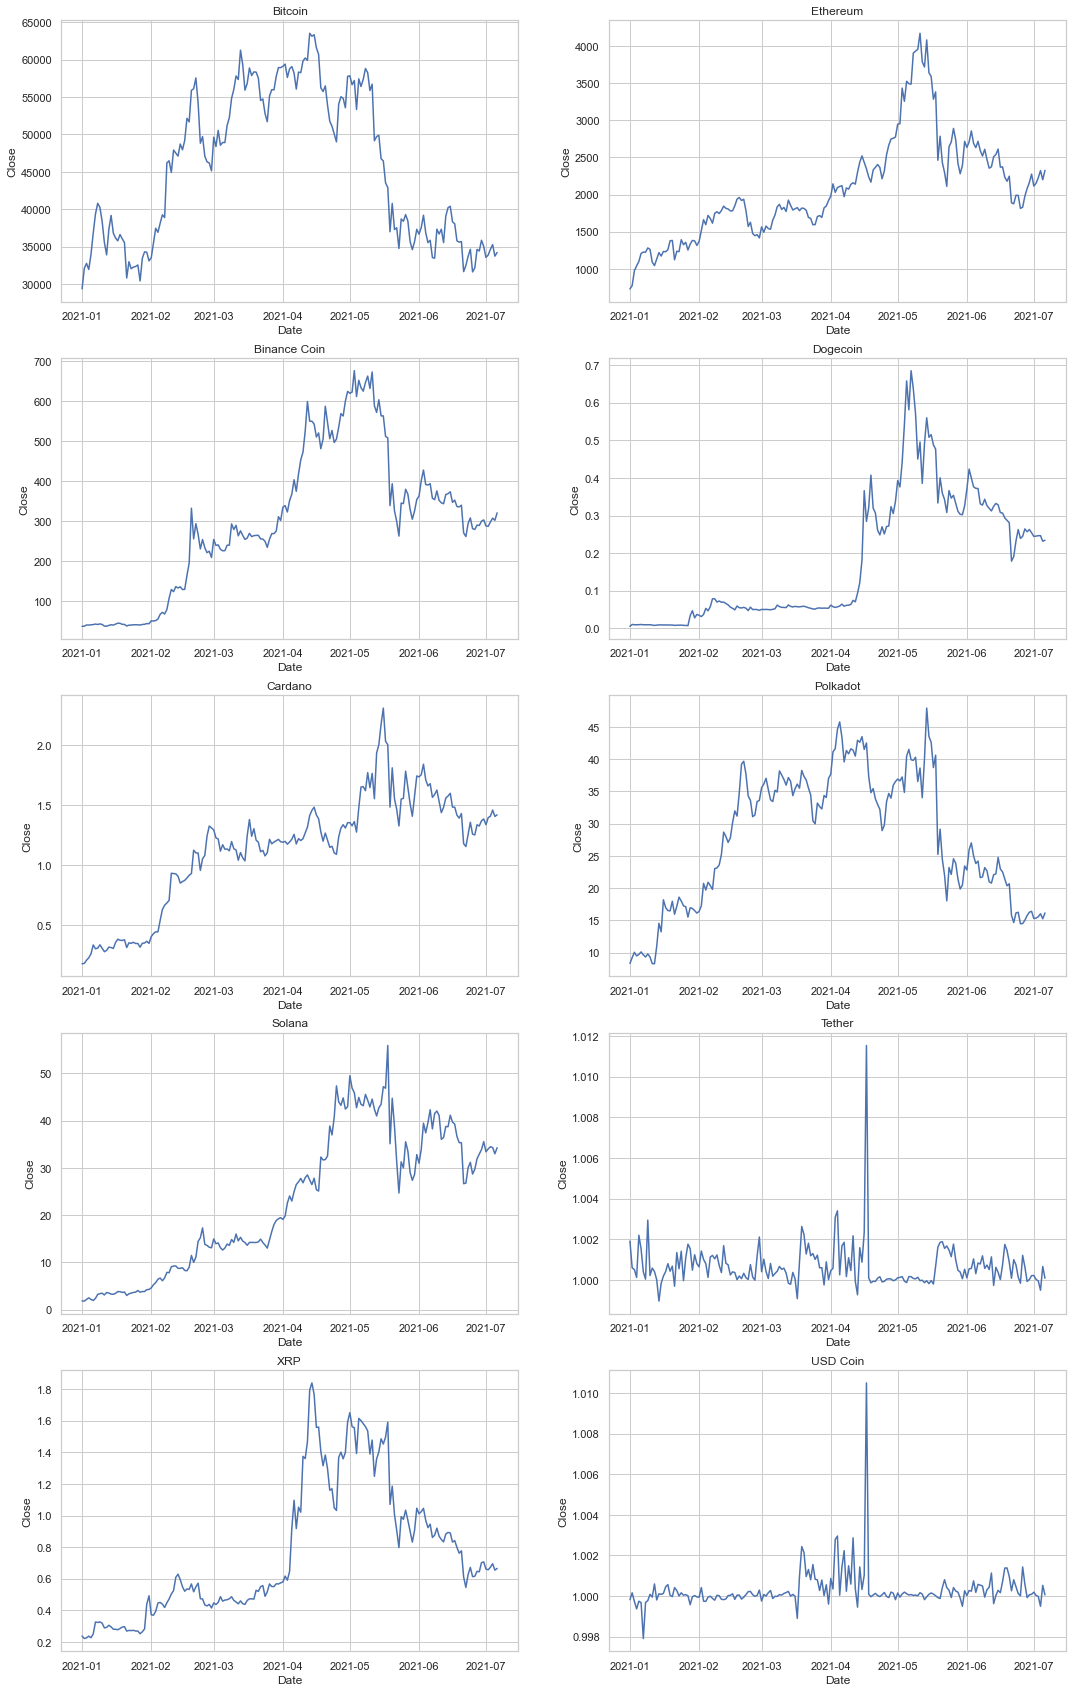

<Figure size 432x288 with 0 Axes>

In [34]:
#price-trend of cryptocurrencies over past  6months from jan-2021 to july-2021

# #close price trends ---for all 10 coins :

#we plot the closing price (adjusted) of the cryptos over the period of past 6 months

#to get a general idea of how the cryptocurrencies performed in the given period.

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(18, 30))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    data["Date"] = pd.to_datetime(data["Date"],format="%d-%m-%Y")
    sns.lineplot(x=data["Date"] ,y=data["Close"], ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
plt.show()
plt.tight_layout()

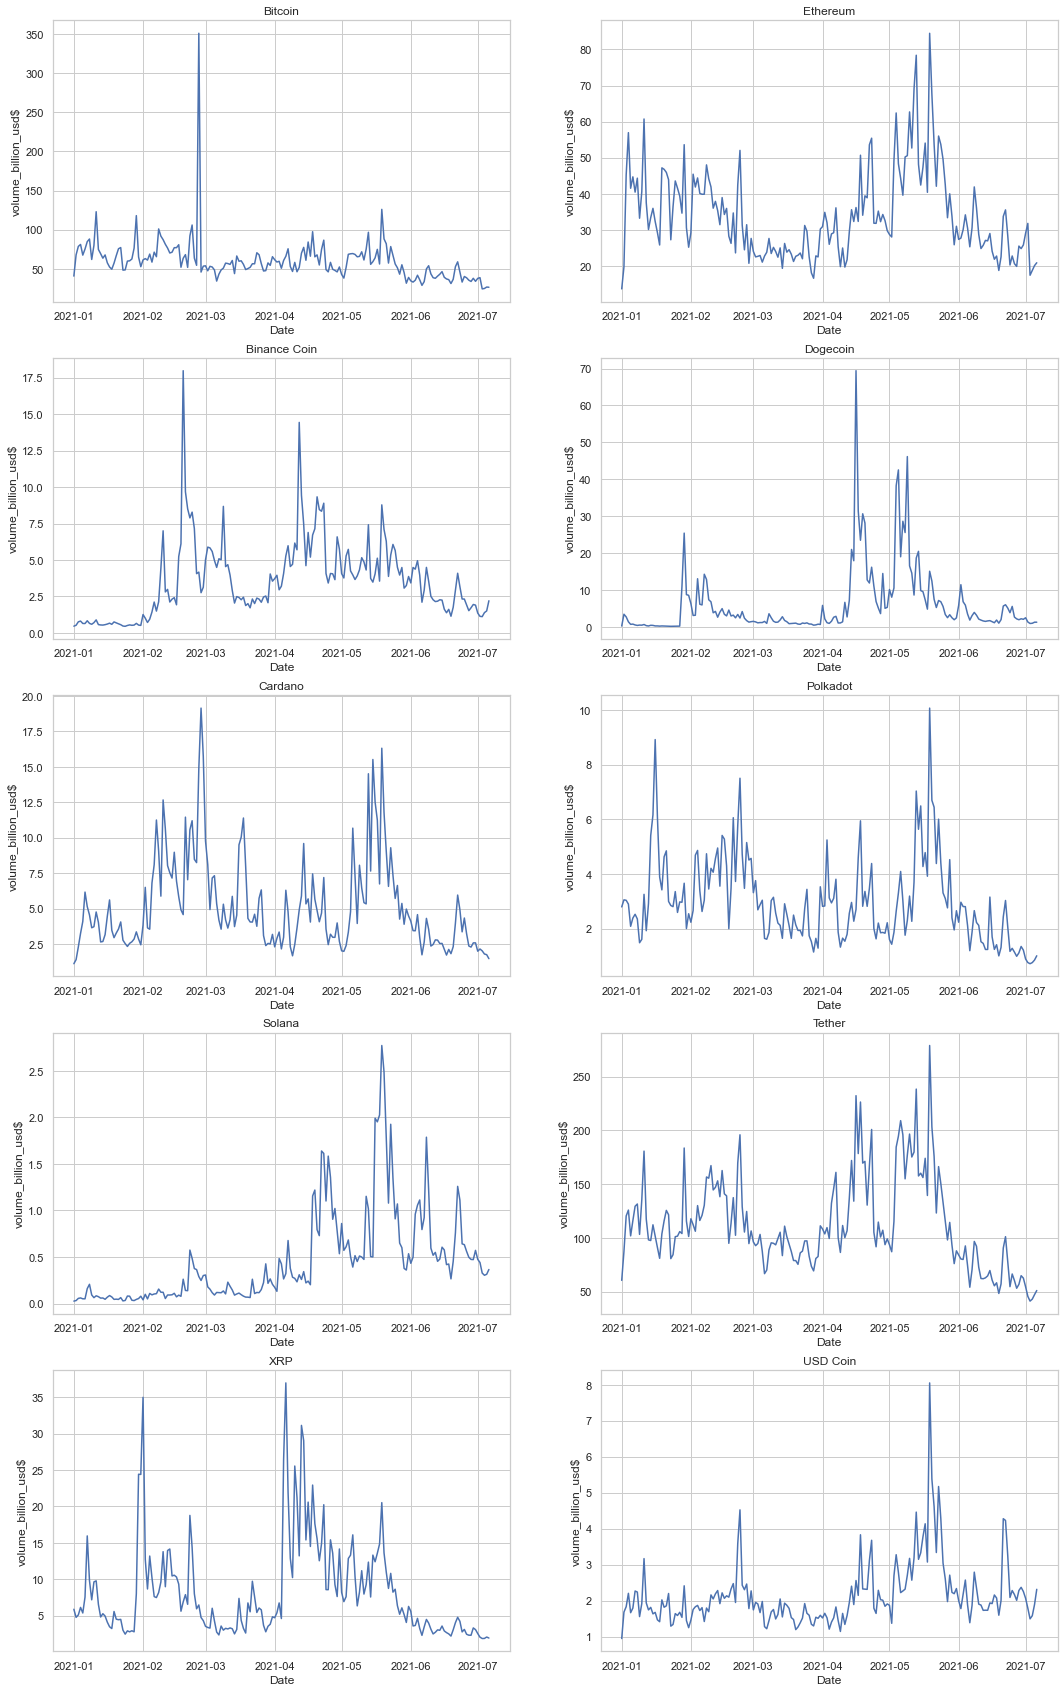

<Figure size 432x288 with 0 Axes>

In [35]:
#VOLUME VS DATE

fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(18, 30))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    
    sns.lineplot(x=data["Date"] ,y=data["volume_billion_usd$"], ax=subplot)

    subplot.set_title(f"{crypto_name}")
    
plt.show()
plt.tight_layout()

# Day-to-day percentage change(Daily returns)

In [36]:
#4. Day-to-day percentage change(Daily returns)
#Daily percentage change in the price of the crypto is calculated on the basis of percentage 
#change between 2 consecutive days’ closing prices. 
#Let’s say if the closing price of the stock yesterday was ₹700 and today the stock closed as ₹750.
#So, the percentage change is 7.14%. i.e. ((750–700) / 700)*100. 
#Accordingly, we’ll introduce a new column ‘Day_Pct%_Change’ denoting the daily returns in the price of the crypto. 
#This can be done using in-built pct_change() function in python.

for data in list_df:
    data["Day_Pct%_Change"] = data["Close"].pct_change()*100
    print(data.head(5))
    
    



      Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   

         Close  market_billion_usd$  volume_billion_usd$  Day_Pct%_Change  
0  29374.15189                546.0            40.730301              NaN  
1  32127.26794                597.0            67.865421         9.372581  
2  32782.02447                609.0            78.665235         2.038009  
3  31971.91352                594.0            81.163475        -2.471205  
4  33992.42934                632.0            67.547325         6.319659  
       Name Symbol       Date         High         Low         Open  \
0  Ethereum    ETH 2021-01-01   749.201859  71

In [37]:
# since the first value in the ‘Day_Pct%_Change’ column is NaN in all datasets. We’ll drop this row.


for data in list_df:
    data.dropna(axis=0,inplace=True)
    data=data.reset_index(drop=True)
    print(data.head(5))
    

      Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
1  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
2  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
3  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   
4  Bitcoin    BTC 2021-01-06  36879.69857  33514.03374  34013.61453   

         Close  market_billion_usd$  volume_billion_usd$  Day_Pct%_Change  
0  32127.26794                597.0            67.865421         9.372581  
1  32782.02447                609.0            78.665235         2.038009  
2  31971.91352                594.0            81.163475        -2.471205  
3  33992.42934                632.0            67.547325         6.319659  
4  36824.36441                685.0            75.289434         8.331076  
       Name Symbol       Date         High          Low         Open  \
0  Ethereum    ETH 2021-01-02   786.798458   

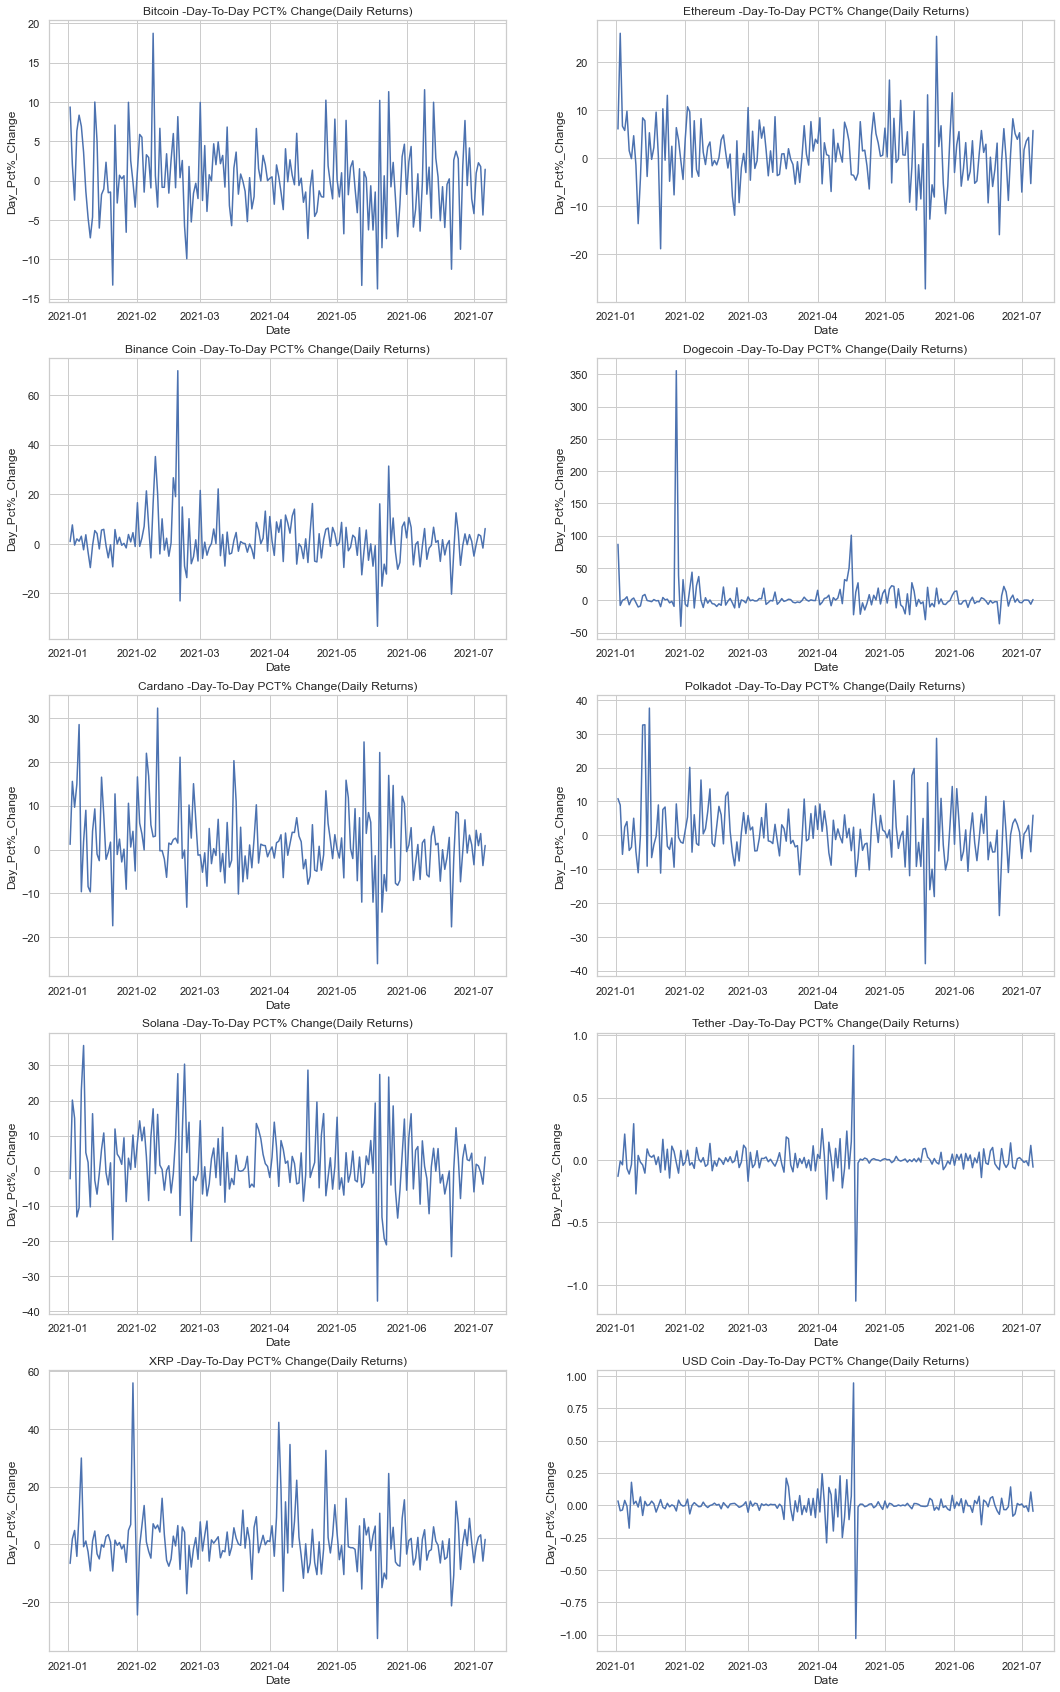

<Figure size 432x288 with 0 Axes>

In [38]:
#Representing daily returns in form of a plot for 187 days—


#bitcoin ----day pct change ---


fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(18, 30))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    
    sns.lineplot(x=data["Date"] ,y=data["Day_Pct%_Change"], ax=subplot)

    subplot.set_title(f"{crypto_name} -Day-To-Day PCT% Change(Daily Returns)")
    
plt.show()
plt.tight_layout()





#inferences ----->>



# Plotting daily returns distribution histogram —

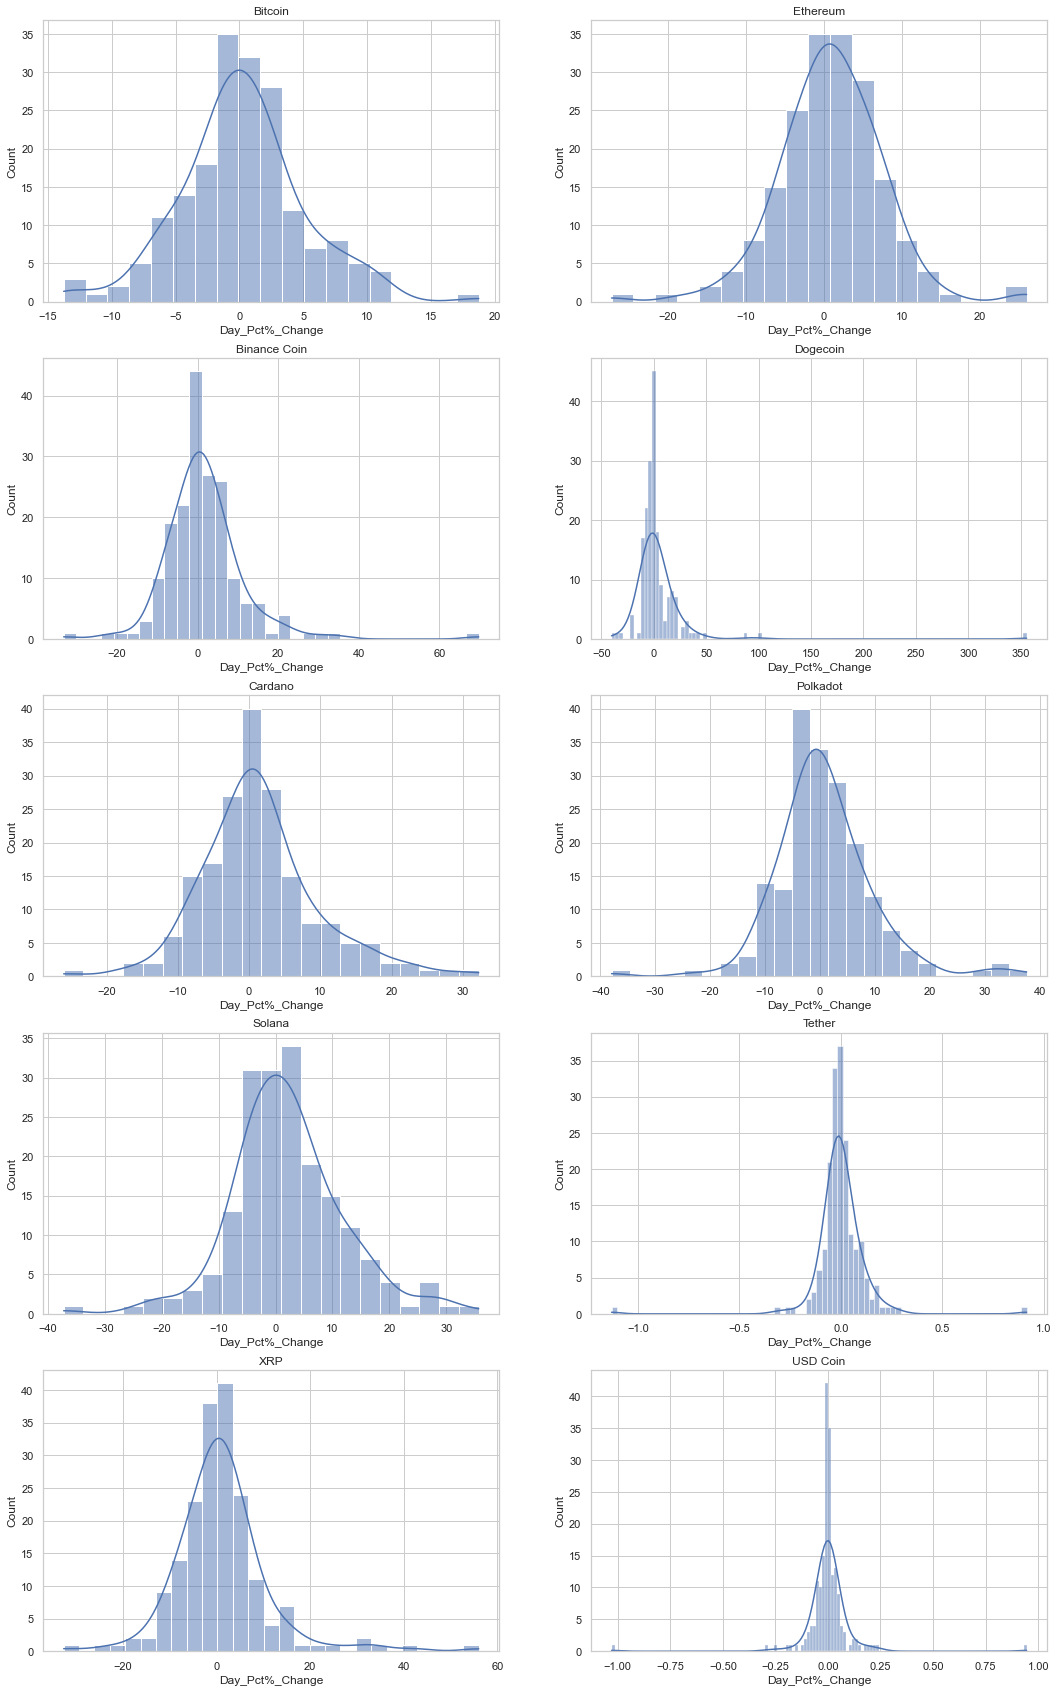

<Figure size 432x288 with 0 Axes>

In [39]:
#Plotting daily returns distribution histogram —


fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(18, 30))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    
    sns.histplot(data["Day_Pct%_Change"], ax=subplot,kde=True)

    subplot.set_title(f"{crypto_name}")
    

plt.show()
plt.tight_layout()



# #satistics
# bitcoin_df["Day_Pct%_Change"].describe()


#1.The daily returns histogram is centered about origin. 
#2.for the past 6 months, the mean daily returns has been about 0.200248
#3.for most of the days we have daily returns less than 2%
#4.max percentage change value is 18% and min percentage change value is -13% in past 6 months bitcoin data.
#5.


In [40]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable Day_Pct%_Change")
    print(data["Day_Pct%_Change"].describe())
    print("skewness of Day_Pct%_Change : ",data["Day_Pct%_Change"].skew())
    print("kurtosis of variable Day_Pct%_Change: ",data["Day_Pct%_Change"].kurt())
    print("*************************")

Bitcoin
general statistics for variable Day_Pct%_Change
count    186.000000
mean       0.200248
std        4.877162
min      -13.766122
25%       -2.297836
50%        0.068390
75%        2.604625
max       18.746471
Name: Day_Pct%_Change, dtype: float64
skewness of Day_Pct%_Change :  0.17901711314630922
kurtosis of variable Day_Pct%_Change:  1.2320391348697584
*************************
Ethereum
general statistics for variable Day_Pct%_Change
count    186.000000
mean       0.848699
std        6.693711
min      -27.200350
25%       -3.006225
50%        0.819391
75%        5.014177
max       25.947532
Name: Day_Pct%_Change, dtype: float64
skewness of Day_Pct%_Change :  -0.07273937873812178
kurtosis of variable Day_Pct%_Change:  2.79518917237504
*************************
Binance Coin
general statistics for variable Day_Pct%_Change
count    186.000000
mean       1.612469
std       10.037163
min      -33.265630
25%       -3.389946
50%        0.410933
75%        5.536166
max       69.760400
N

In [41]:
#summary data related to daily_pct%_change

data_df=[]
for data,crypto in zip(list_df,crypto_names):

    
    new_df=data[data["Day_Pct%_Change"]==data["Day_Pct%_Change"].max()]
    data_df.append(new_df)

data_df
new_df = pd.concat(data_df)

new_df=new_df.sort_values(by="Day_Pct%_Change",ascending=False)
new_df=new_df.reset_index(drop=1)
new_df

Name Symbol       Date          High           Low          Open  \
0      Dogecoin   DOGE 2021-01-28      0.034177      0.007351      0.007481   
1  Binance Coin    BNB 2021-02-19    342.879593    195.385744    195.987856   
2           XRP    XRP 2021-01-30      0.489346      0.279825      0.282152   
3      Polkadot    DOT 2021-01-16     19.322062     13.185754     13.198050   
4        Solana    SOL 2021-01-08      3.779320      2.180929      2.368740   
5       Cardano    ADA 2021-02-10      0.943893      0.703548      0.703548   
6      Ethereum    ETH 2021-01-03   1006.565002    771.561646    774.511865   
7       Bitcoin    BTC 2021-02-08  46203.931440  38076.322810  38886.827290   
8      USD Coin   USDC 2021-04-17      1.010725      0.998769      1.001035   
9        Tether   USDT 2021-04-17      1.011868      0.999549      1.002434   

          Close  market_billion_usd$  volume_billion_usd$  Day_Pct%_Change  
0      0.034084             4.367344            10.971545       355.571209  
1    332.616033            51.400082            17.982945        69.760400  
2      0.440244            19.988871            24.417466        56.011236  
3     18.180424            16.377018             8.917082        37.601425  
4      3.219887             0.843292             0.206412        35.703057  
5      0.930318            28.944520            12.667654        32.238400  
6    975.507673           111.310000            45.200463        25.947532  
7  46196.463720           860.000000           101.000000        18.746471  
8      1.010496            11.425630             2.143518         0.945298  
9      1.011530            48.354952           178.501000         0.916279

In [42]:
crypto_df

Name Symbol       Date          High           Low          Open  \
0      Bitcoin    BTC 2021-01-01  29600.626950  28803.585010  28994.008920   
1      Bitcoin    BTC 2021-01-02  33155.118820  29091.181190  29376.455830   
2      Bitcoin    BTC 2021-01-03  34608.556740  32052.317080  32129.407360   
3      Bitcoin    BTC 2021-01-04  33440.218570  28722.755270  32810.947640   
4      Bitcoin    BTC 2021-01-05  34437.590590  30221.186740  31977.041130   
...        ...    ...        ...           ...           ...           ...   
1865  USD Coin   USDC 2021-07-02      1.000916      0.999966      1.000177   
1866  USD Coin   USDC 2021-07-03      1.000670      0.999925      1.000048   
1867  USD Coin   USDC 2021-07-04      1.000187      0.998901      0.999956   
1868  USD Coin   USDC 2021-07-05      1.000839      0.999459      0.999565   
1869  USD Coin   USDC 2021-07-06      1.000731      0.999662      1.000501   

             Close  market_billion_usd$  volume_billion_usd$  
0     29374.151890           546.000000            40.730301  
1     32127.267940           597.000000            67.865421  
2     32782.024470           609.000000            78.665235  
3     31971.913520           594.000000            81.163475  
4     33992.429340           632.000000            67.547325  
...            ...                  ...                  ...  
1865      1.000035            25.397755             1.787896  
1866      0.999984            25.504372             1.491017  
1867      0.999500            25.511719             1.578667  
1868      1.000528            25.547238             1.887496  
1869      1.000059            25.673217             2.312602  

[1870 rows x 9 columns]

# TREND ANALYSIS

In [43]:
# 5. Trend Analysis
# Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage 
# change we calculated above. 
# Trend is determined from below relationship —

def get_trend(x):
    
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"
    
    

for data in list_df:

    data["Trend"] = data["Day_Pct%_Change"].apply(lambda x:get_trend(x))
    print(data.head(5))



      Name Symbol       Date         High          Low         Open  \
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   
5  Bitcoin    BTC 2021-01-06  36879.69857  33514.03374  34013.61453   

         Close  market_billion_usd$  volume_billion_usd$  Day_Pct%_Change  \
1  32127.26794                597.0            67.865421         9.372581   
2  32782.02447                609.0            78.665235         2.038009   
3  31971.91352                594.0            81.163475        -2.471205   
4  33992.42934                632.0            67.547325         6.319659   
5  36824.36441                685.0            75.289434         8.331076   

               Trend  
1           Bull run  
2           Positive  
3           Negative  
4  Among top gaine

# We wish to see how the cryptocurrencies were trending in past 6months from 1st jan 2021 to 7th july 2021.
# This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. 
# We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category. For this, 
# we’ll use the groupby() function with the trend column to aggregate all days with the same trend into a single group before plotting the pie chart. 
# Visualizing Trend Frequency with Pie-Chart —

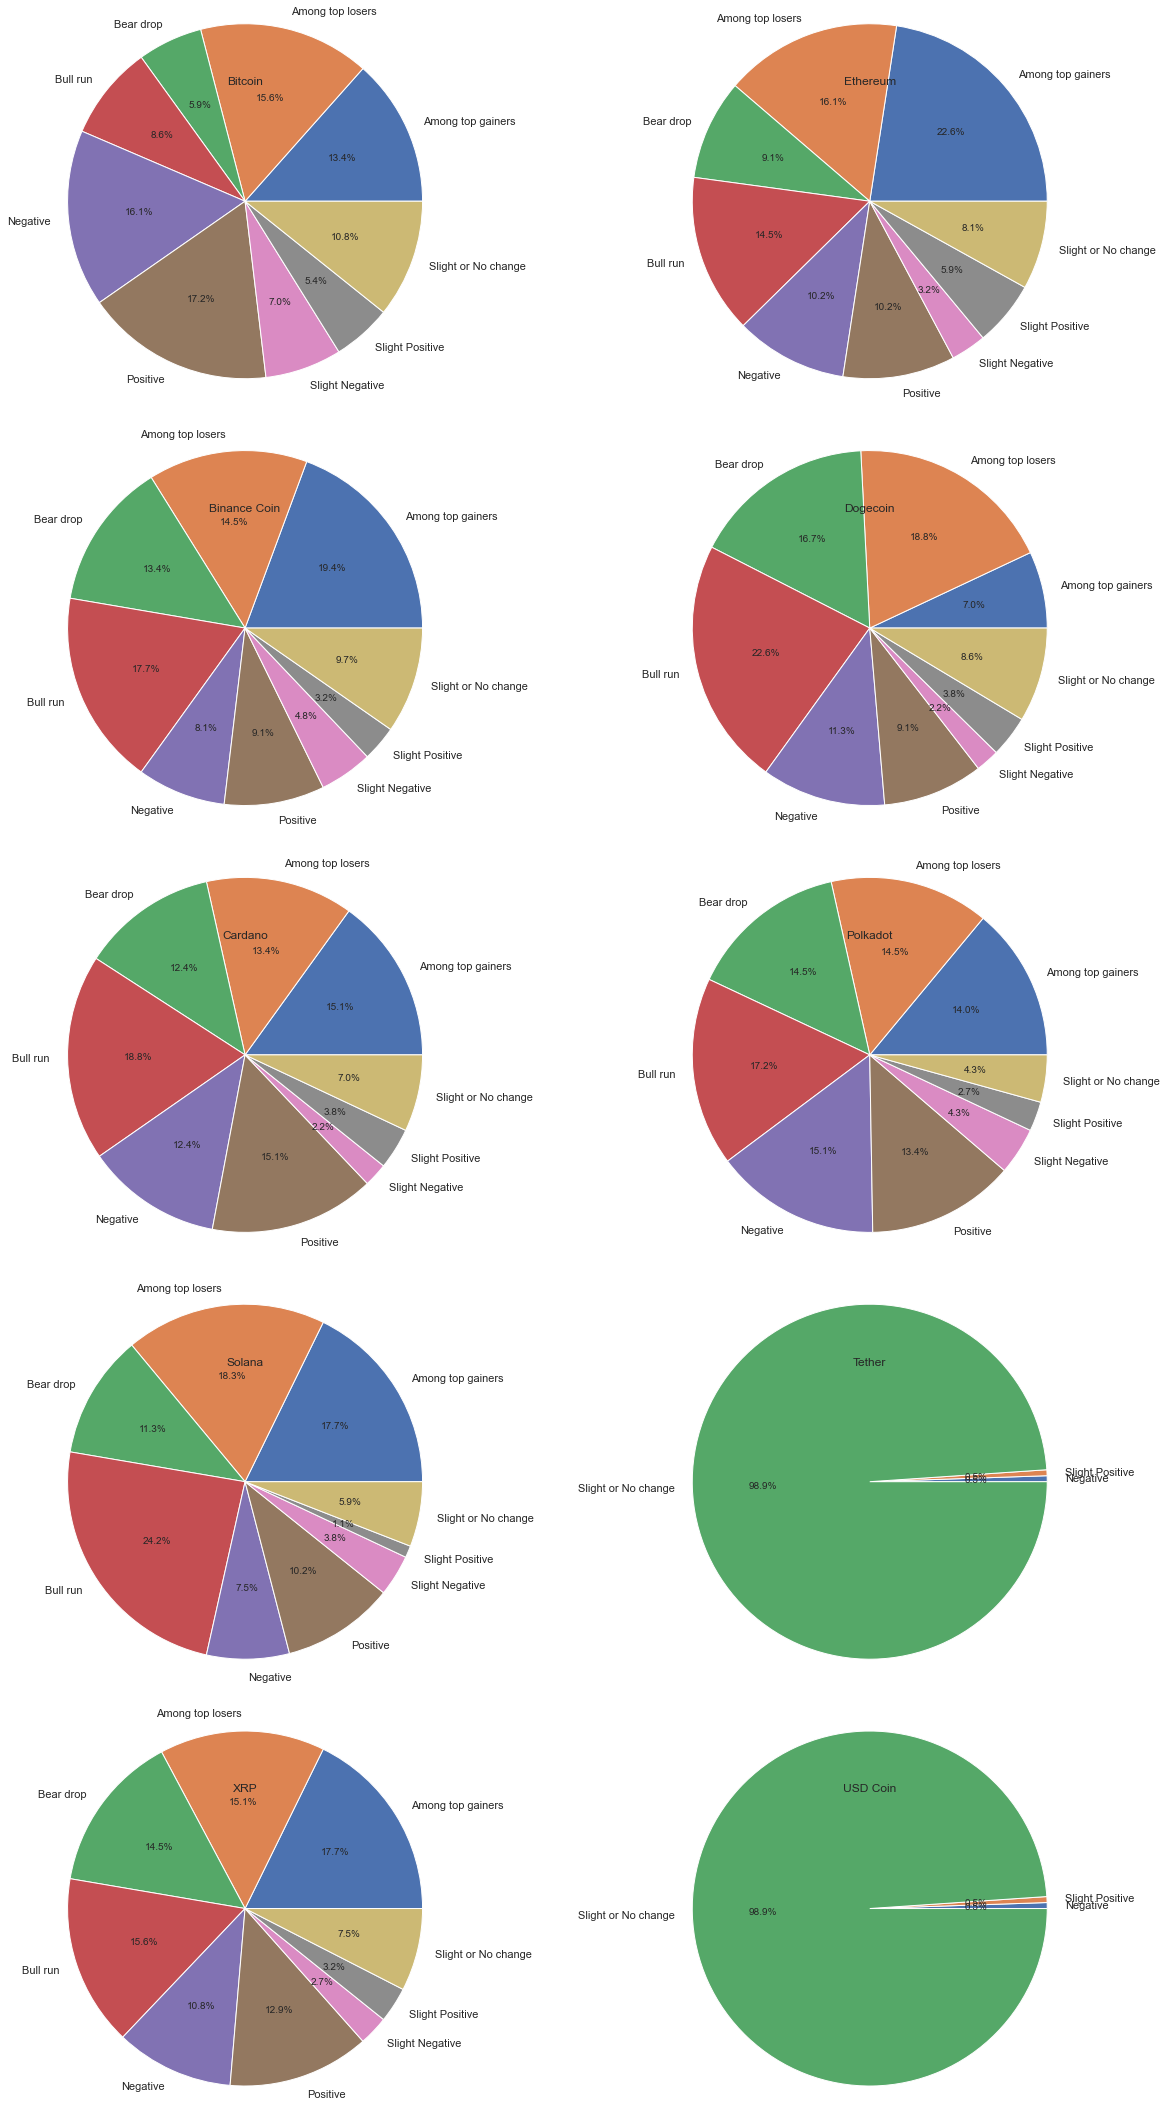

<Figure size 432x288 with 0 Axes>

In [44]:



fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(18, 30))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    pie_data_bitcoin = data.groupby('Trend')
    
    pie_label = sorted([i for i in data.loc[:,'Trend'].unique()])
    
    subplot.pie(pie_data_bitcoin['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

    subplot.set_title(f"{crypto_name}",loc="center")
    
    plt.tight_layout(pad=4)
  

 
plt.show()

plt.tight_layout(pad=8)



#
#1.
#2.


# Daily Returns and Volume


<Figure size 720x720 with 0 Axes>

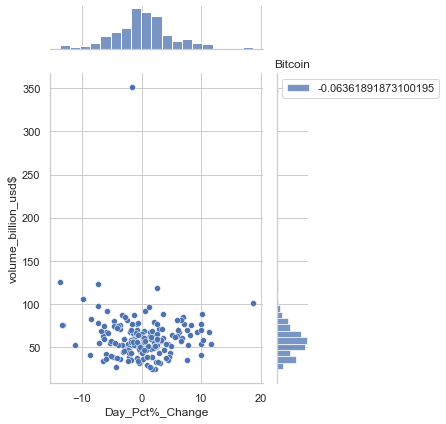

<Figure size 720x720 with 0 Axes>

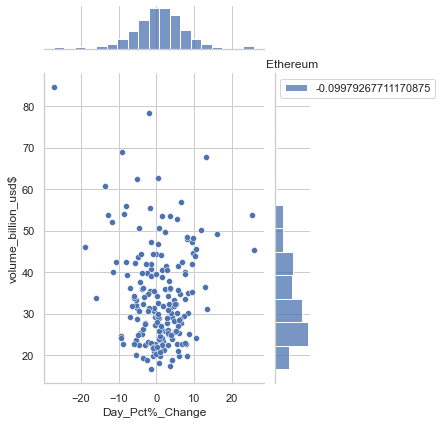

<Figure size 720x720 with 0 Axes>

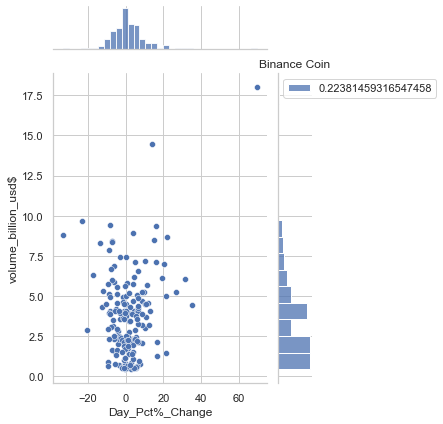

<Figure size 720x720 with 0 Axes>

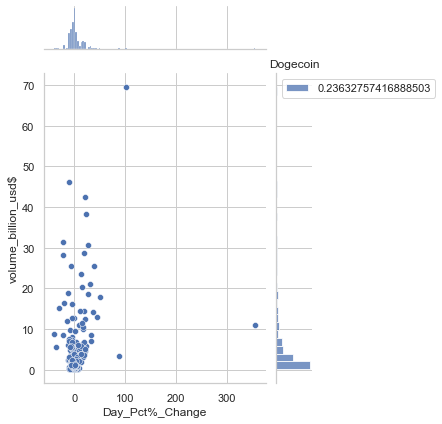

<Figure size 720x720 with 0 Axes>

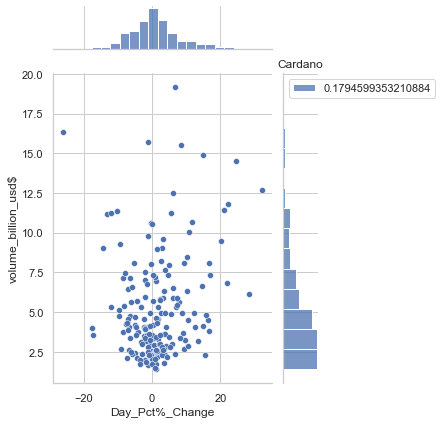

<Figure size 720x720 with 0 Axes>

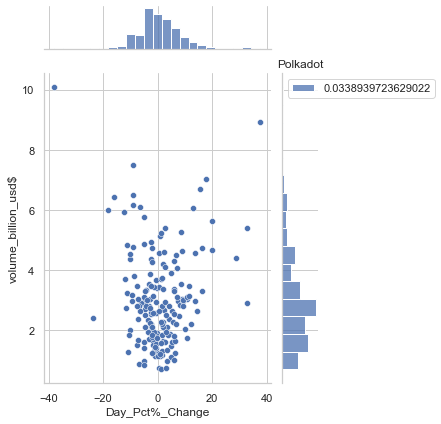

<Figure size 720x720 with 0 Axes>

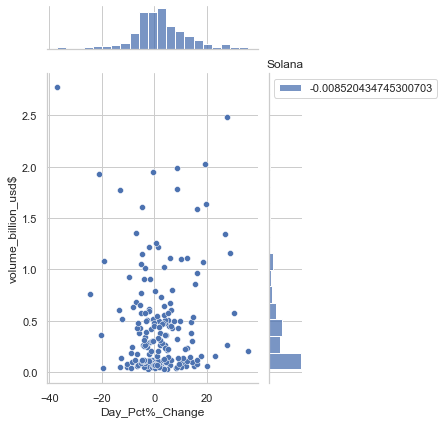

<Figure size 720x720 with 0 Axes>

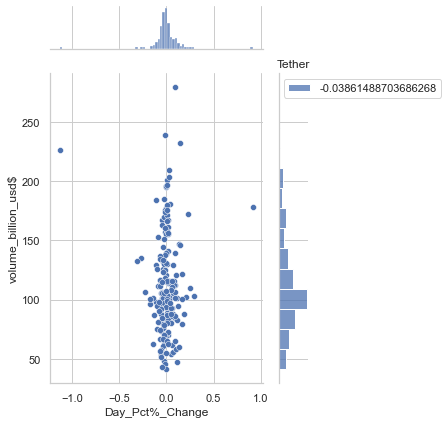

<Figure size 720x720 with 0 Axes>

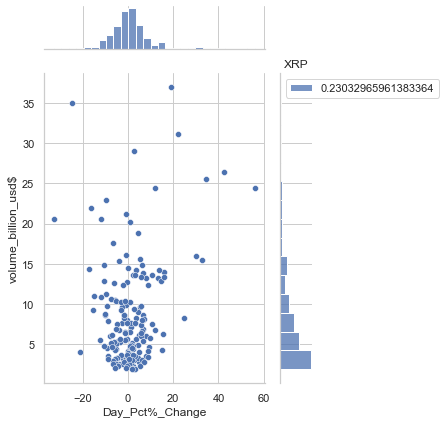

<Figure size 720x720 with 0 Axes>

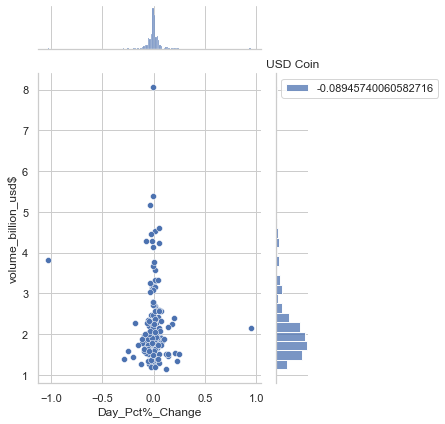

In [45]:
from scipy.stats import stats




for data,crypto_name in zip(list_df,crypto_names):
    
    plt.figure(figsize=(10, 10))
    
    sns.jointplot(x="Day_Pct%_Change",y="volume_billion_usd$",data=data,kind="scatter")
    plt.legend(stats.pearsonr(data["Day_Pct%_Change"],data["volume_billion_usd$"]))
    
    plt.title(f"{crypto_name}")
   
    plt.tight_layout()

plt.show()

# the daily trade volume with the daily returns,
# it was observed that whenever the volume of crypto traded is high,
# there is comparatively high rise or fall in the price of the crypto leading to the high returns. 
# Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a
# big change in the market in the either direction. 
# Volume of crypto traded when coupled with the rise or fall in Price of crypto, in general, 
# is an indicator of the confidence of the traders & investors in a particular crypto.


# Top 10 cryptocurrencies in 2021 date range from 1st jan 2021 to 6th july 2021

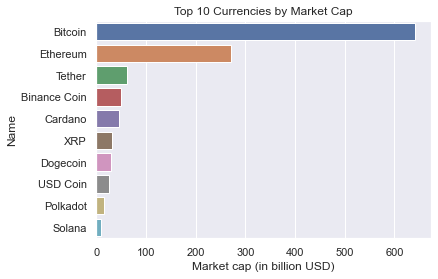

In [46]:

sns.set_style(style="darkgrid")

grouped_data = crypto_df.groupby(['Name'])['market_billion_usd$'].last().sort_values(ascending=False).head(10).sort_values(ascending=False)

grouped_data=pd.DataFrame(grouped_data)

grouped_data=grouped_data.reset_index()

sns.barplot(x="market_billion_usd$",y="Name",data=grouped_data)

plt.xlabel("Market cap (in billion USD)")



plt.title("Top 10 Currencies by Market Cap")

plt.show()

In [47]:
grouped_data

Name  market_billion_usd$
0       Bitcoin           642.000000
1      Ethereum           271.029000
2        Tether            62.333838
3  Binance Coin            49.241956
4       Cardano            45.301576
5           XRP            30.722841
6      Dogecoin            30.552518
7      USD Coin            25.673217
8      Polkadot            15.467725
9        Solana             9.343050

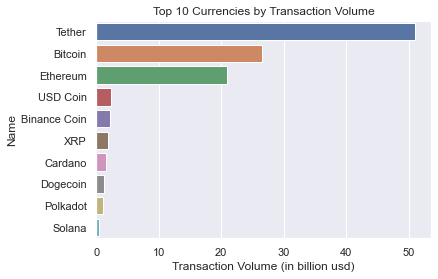

In [48]:

sns.set_style(style="darkgrid")

grouped_data_2= crypto_df.groupby(['Name'])['volume_billion_usd$'].last().sort_values(ascending=False).head(10).sort_values(ascending=False)

grouped_data_2=pd.DataFrame(grouped_data_2)

grouped_data_2=grouped_data_2.reset_index()

sns.barplot(y="Name",x="volume_billion_usd$",data=grouped_data_2)

plt.xlabel("Transaction Volume (in billion usd)")

plt.title("Top 10 Currencies by Transaction Volume")

plt.show()

# Monthly end closing prices for all 10 cryptocurrencies 


In [49]:
# def plot_with_textvalue(df):
    
    
#     ax=plt.barh(df[""],df[""])
#     ax.set_ylabel("Yearly closing prices (in USD)")

#     for rect in ax.patches:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d$' % int(height), ha='center', va='bottom')
        
        
        
        


In [50]:
# import datetime

# new_data=crypto_df.copy()
# # new_data=crypto_df[(crypto_df["Name"]=="Bitcoin") | (crypto_df["Name"]=="Ethereum")]
# new_data["Month_Name"]=new_data["Date"].apply(lambda x:x.strftime("%B"))

In [51]:
# new_group=new_data.groupby(["Name","Month_Name"])["Close"].last().reset_index()

In [52]:

# # plt.figure(figsize=(20,18))

# # sns.barplot(x="Close",y="Month_Name",data=new_group,hue="Name",orient="h")

# new_group["month_number"]=new_group["Month_Name"].map({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7})

# new_group

In [53]:
# sns.barplot(x="Month_Name",y="Close",data=new_group,hue="Name")

# Experiment


           Name      Earnings
0       Bitcoin    165.487044
1      Ethereum   2182.889749
2  Binance Coin   7466.817314
3      Dogecoin  40235.428218
4       Cardano   7086.987317


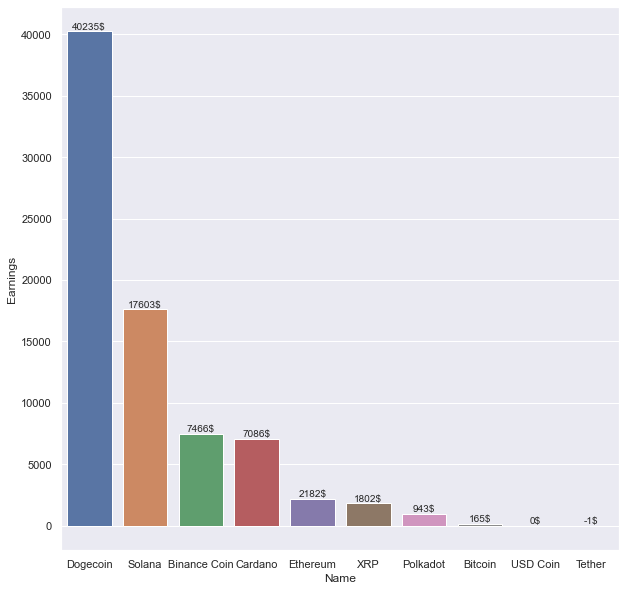

In [54]:
def calc_earnings(currency_name, df):
    #print("Displaying stats for "+currency_name)

    closing_prices = df[(df['Name'] == currency_name) & (~df['Close'].isnull())][['Date', 'Close']]

    # Num. currency purchased for 1000$
    #print("Closing price at the beginning: " + str(closing_prices.iloc[0]['close']))

    num_units_purchased = 1000 / closing_prices.iloc[0]['Close']
    num_units_purchased

    #print("Num. units purchased: " + str(num_units_purchased))

    # Current value
    last_price = closing_prices.iloc[-1]['Close']
    #print("Last price: " + str(last_price))

    amount_earned = (num_units_purchased * last_price) - 1000

    #print("Amount you would have earned: " + str(amount_earned) + "$")
    
    return amount_earned
    
# Borrow the index :-)

lst=[]



for currency in crypto_names:
    
    top_10_currencies_earnings = {}
    
    top_10_currencies_earnings["Name"]=currency
    
    top_10_currencies_earnings["Earnings"] = calc_earnings(currency, crypto_df)
    
    lst.append(top_10_currencies_earnings)
    
    
top_10_currencies_earnings = pd.DataFrame(lst,columns=["Name","Earnings"])

print(top_10_currencies_earnings.head(5))
    
top_10_currencies_earnings = top_10_currencies_earnings.sort_values(by="Earnings",ascending=False)

plt.figure(figsize=(10,10))

ax=sns.barplot(x=top_10_currencies_earnings["Name"],y=top_10_currencies_earnings["Earnings"])

for rect in ax.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d$' % int(height), ha='center', va='bottom')

# heatmap -correlation analysis

In [55]:
cross_tab_crypto=pd.crosstab(index=crypto_df["Date"],columns=crypto_df["Name"],values=crypto_df["Close"],aggfunc=sum)

# cross_tab_crypto=cross_tab_crypto.reset_index()

# cross_tab_crypto.columns=['Date', 'Binance Coin', 'Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum',
#                           'Polkadot', 'Solana', 'Tether', 'USD Coin', 'XRP']

cross_tab_crypto

Name        Binance Coin      Bitcoin   Cardano  Dogecoin     Ethereum  \
Date                                                                     
2021-01-01     37.905011  29374.15189  0.175350  0.005685   730.367569   
2021-01-02     38.241593  32127.26794  0.177423  0.010615   774.534968   
2021-01-03     41.148980  32782.02447  0.204995  0.009771   975.507673   
2021-01-04     40.926355  31971.91352  0.224762  0.009767  1040.233048   
2021-01-05     41.734600  33992.42934  0.258314  0.009920  1100.006099   
...                  ...          ...       ...       ...          ...   
2021-07-02    287.423094  33897.04859  1.394397  0.245264  2150.040364   
2021-07-03    298.237117  34668.54840  1.406836  0.246411  2226.114282   
2021-07-04    307.732096  35287.77977  1.458184  0.246483  2321.724112   
2021-07-05    302.377980  33746.00246  1.404898  0.231614  2198.582464   
2021-07-06    320.934802  34235.19345  1.418053  0.234422  2324.679449   

Name         Polkadot     Solana    Tether  USD Coin       XRP  
Date                                                            
2021-01-01   8.306819   1.842084  1.001916  0.999823  0.237444  
2021-01-02   9.208837   1.799275  1.000600  1.000162  0.221655  
2021-01-03  10.033283   2.161752  1.000514  0.999736  0.225848  
2021-01-04   9.469611   2.485097  1.000128  0.999372  0.236677  
2021-01-05   9.701656   2.157217  1.002202  0.999749  0.226750  
...               ...        ...       ...       ...       ...  
2021-07-02  15.340774  34.020482  1.000033  1.000035  0.656763  
2021-07-03  15.553716  34.478816  0.999956  0.999984  0.672888  
2021-07-04  16.014026  34.310601  0.999501  0.999500  0.694945  
2021-07-05  15.235582  32.984588  1.000667  1.000528  0.654300  
2021-07-06  16.143564  34.269140  1.000090  1.000059  0.665402  

[187 rows x 10 columns]

<Figure size 1296x1440 with 0 Axes>

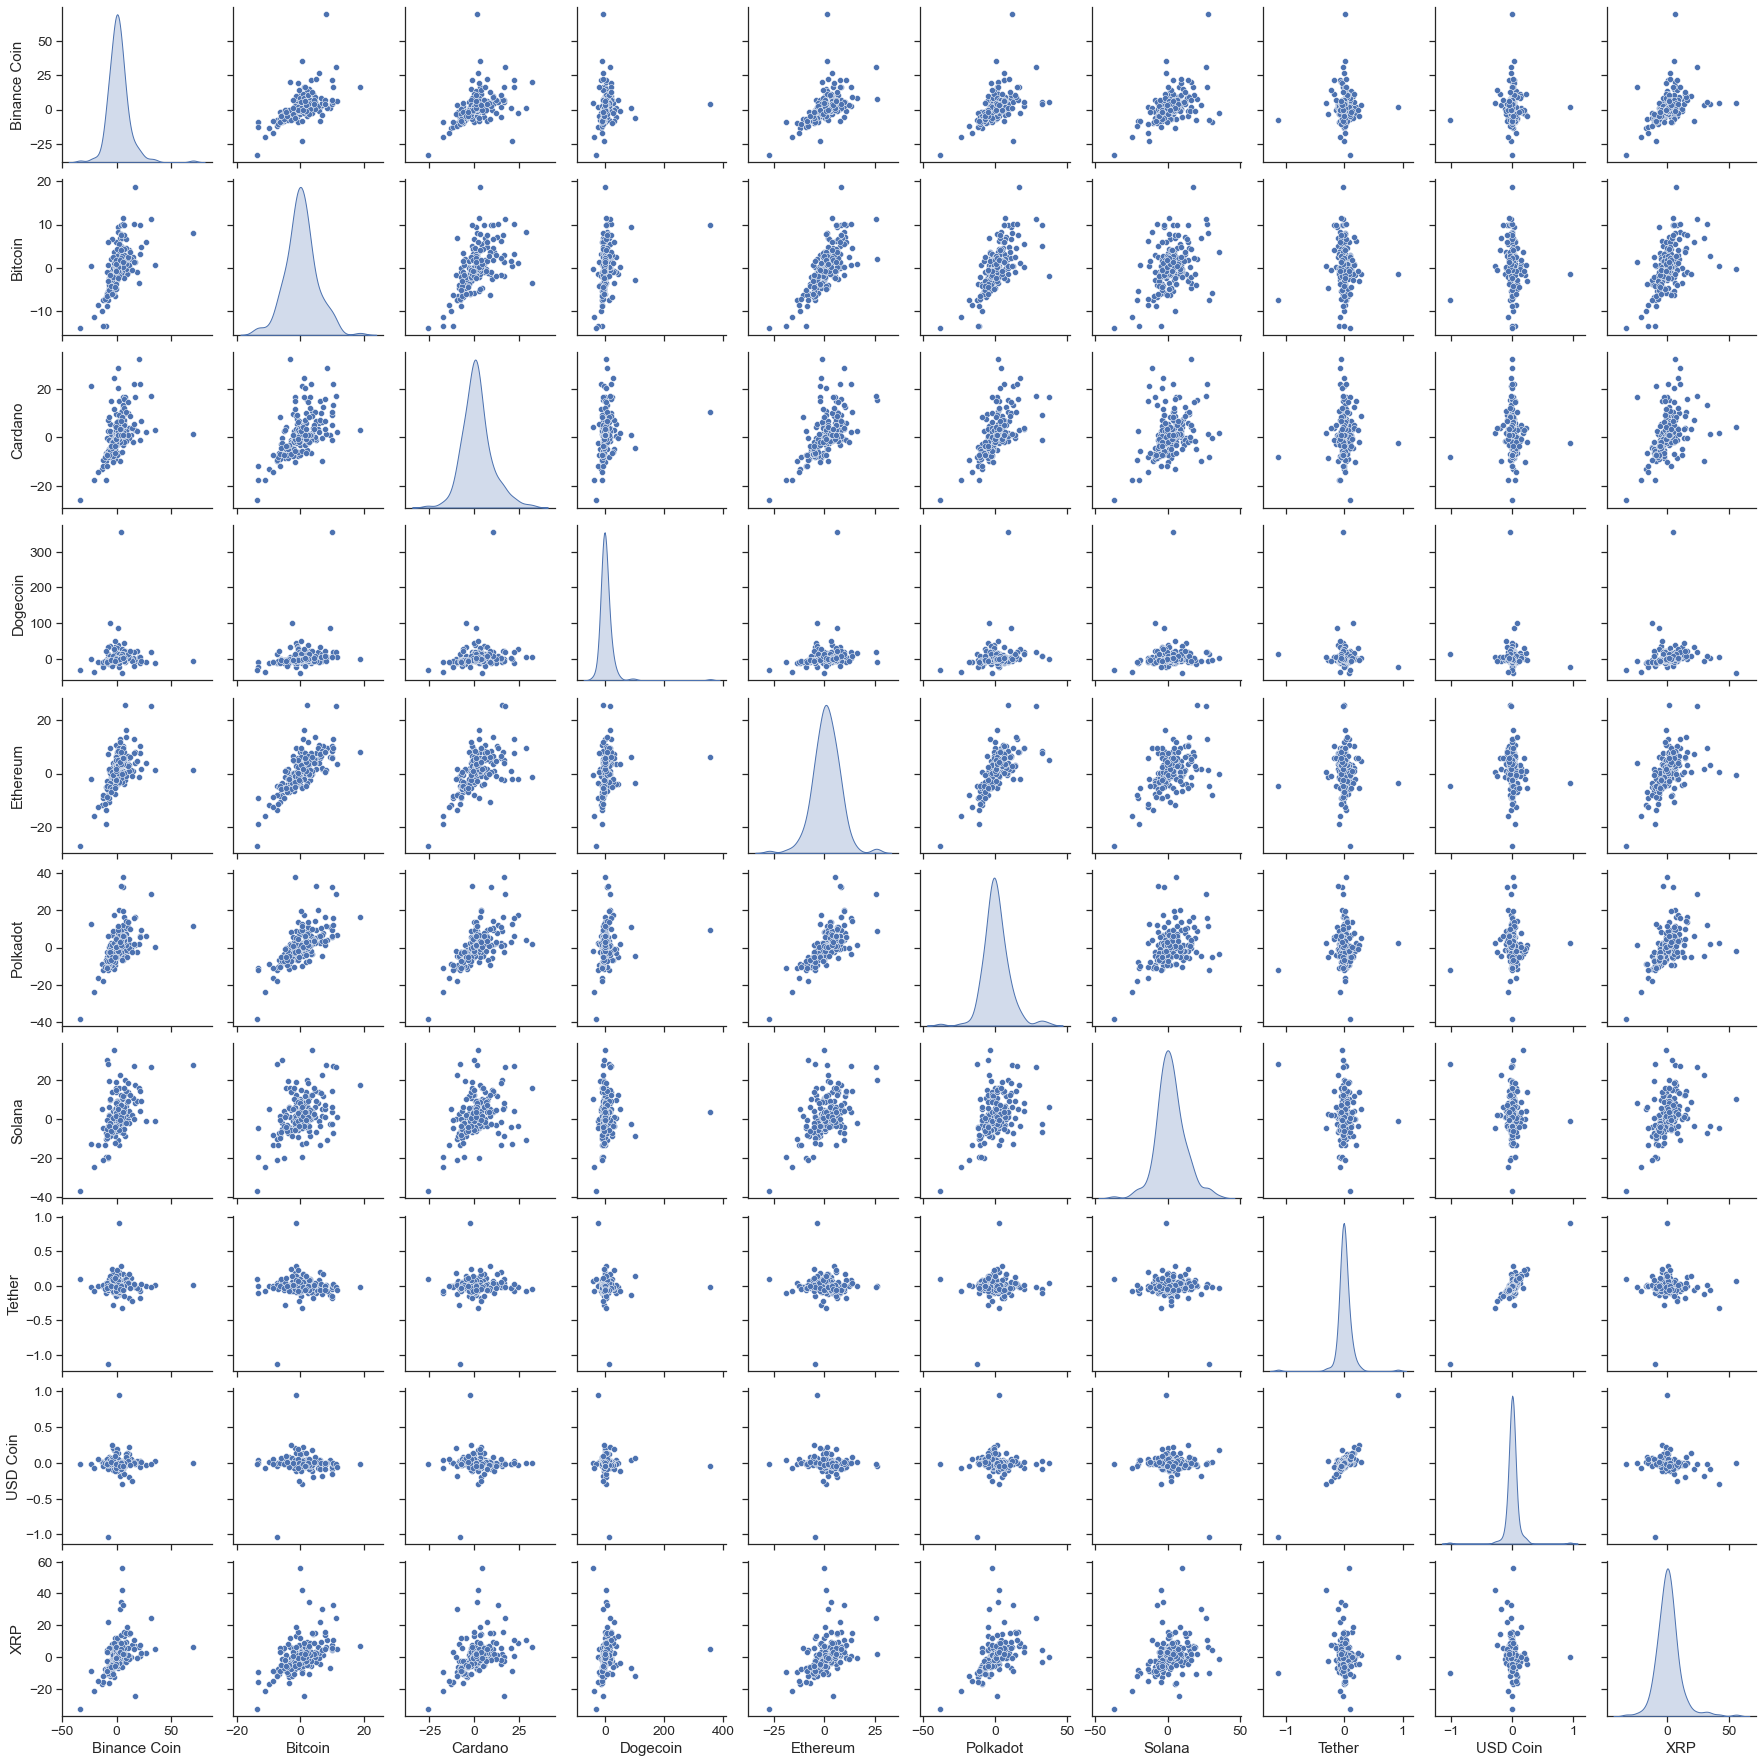

In [56]:
# store daily returns of all above stocks in a new dataframe 

pct_chg_df = cross_tab_crypto.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize=(18,20))
sns.set(style = "ticks", font_scale = 1.25)
sns.pairplot(pct_chg_df,diag_kind="kde")

In [57]:
pct_chg_df

Name        Binance Coin   Bitcoin    Cardano   Dogecoin   Ethereum  \
Date                                                                  
2021-01-02      0.887962  9.372581   1.181962  86.712132   6.047284   
2021-01-03      7.602684  2.038009  15.540791  -7.951286  25.947532   
2021-01-04     -0.541024 -2.471205   9.642667  -0.034082   6.635045   
2021-01-05      1.974877  6.319659  14.927440   1.568619   5.746121   
2021-01-06      1.033567  8.331076  28.486625   5.491109   9.736867   
...                  ...       ...        ...        ...        ...   
2021-07-02     -0.275940  0.967860   4.401398   0.292104   1.723824   
2021-07-03      3.762406  2.276009   0.892062   0.467729   3.538255   
2021-07-04      3.183701  1.786147   3.649927   0.029228   4.294920   
2021-07-05     -1.739863 -4.369154  -3.654291  -6.032298  -5.303888   
2021-07-06      6.136962  1.449626   0.936336   1.212075   5.735377   

Name         Polkadot     Solana    Tether  USD Coin        XRP  
Date                                                             
2021-01-02  10.858765  -2.323957 -0.131302  0.033879  -6.649751  
2021-01-03   8.952770  20.145735 -0.008604 -0.042599   1.891801  
2021-01-04  -5.618015  14.957566 -0.038615 -0.036383   4.794783  
2021-01-05   2.450412 -13.193863  0.207424  0.037680  -4.194322  
2021-01-06   4.065413 -10.569193 -0.067298 -0.006823  10.648307  
...               ...        ...       ...       ...        ...  
2021-07-02   0.404547   1.845431 -0.019351 -0.015697  -0.668096  
2021-07-03   1.388078   1.347229 -0.007644 -0.005088   2.455268  
2021-07-04   2.959485  -0.487877 -0.045541 -0.048359   3.277996  
2021-07-05  -4.861013  -3.864735  0.116712  0.102792  -5.848669  
2021-07-06   5.959614   3.894401 -0.057694 -0.046900   1.696791  

[186 rows x 10 columns]

In [58]:
# Although the pair plots provide very good 
# visualization of all possible combinations between the bunch of cryptos,
# it doesn’t provide any detailed information like Pearson’s R value or null-hypothesis p value to quantify the correlation.
# That’s where the joint plot comes into the picture!
# While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson’s R value 
# (Pearson’s correlation coefficient) for each pair of cryptos. Pearson’s R value ranges from -1 to 1. Negative value indicates a negative linear 
# relation between the variables, while positive value indicates a positive relationship. Pearson’s R value closer to 1 (or -1) indicates strong correlation, 
# while value closer to 0 indicates weak correlation.
# In addition to Pearson’s R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.

C:\Users\GAURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GAURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


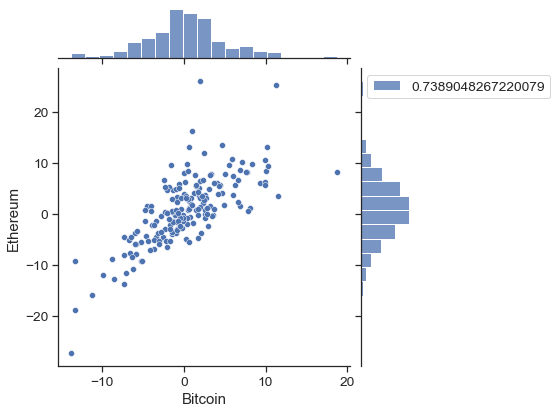

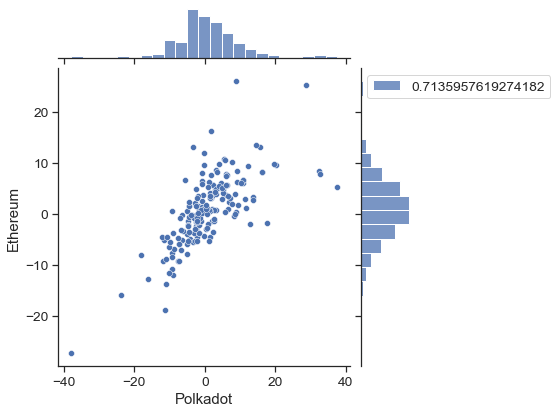

In [59]:
from scipy.stats import stats


sns.jointplot("Bitcoin", "Ethereum", pct_chg_df, kind = "scatter")
plt.legend(stats.pearsonr(pct_chg_df["Bitcoin"],pct_chg_df["Ethereum"]))


sns.jointplot("Polkadot", "Ethereum", pct_chg_df, kind = "scatter")
plt.legend(stats.pearsonr(pct_chg_df["Polkadot"],pct_chg_df["Ethereum"]))

plt.show()

<AxesSubplot:xlabel='Name', ylabel='Name'>

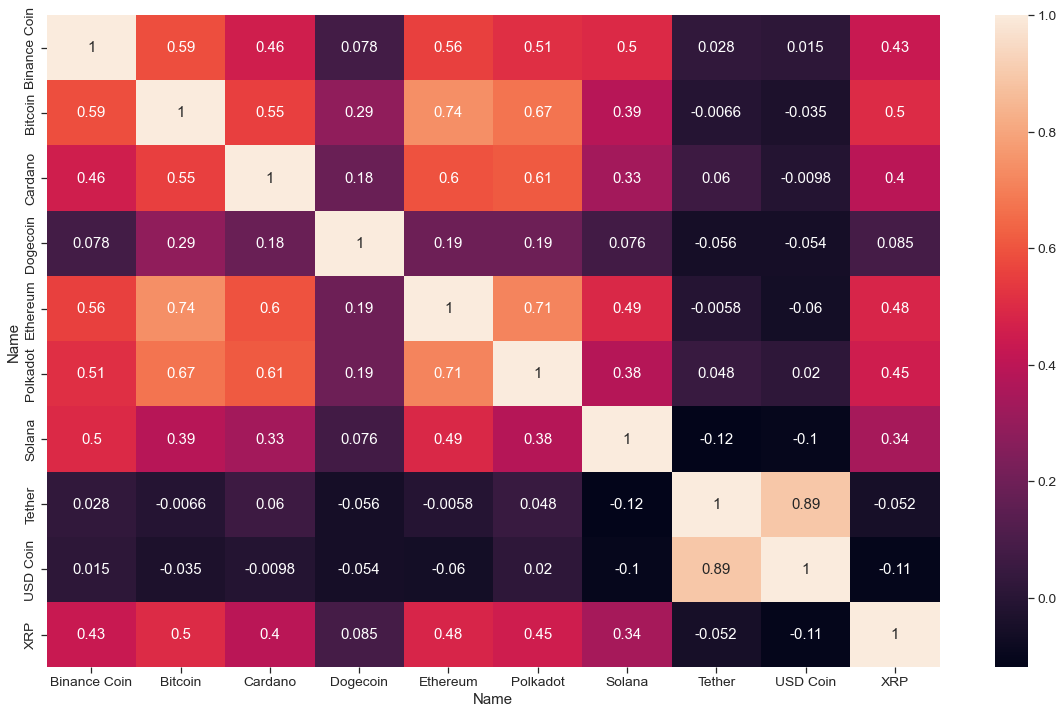

In [60]:
plt.figure(figsize=(20,12))

sns.heatmap(pct_chg_df.corr(),annot=True)

<AxesSubplot:xlabel='Name', ylabel='Name'>

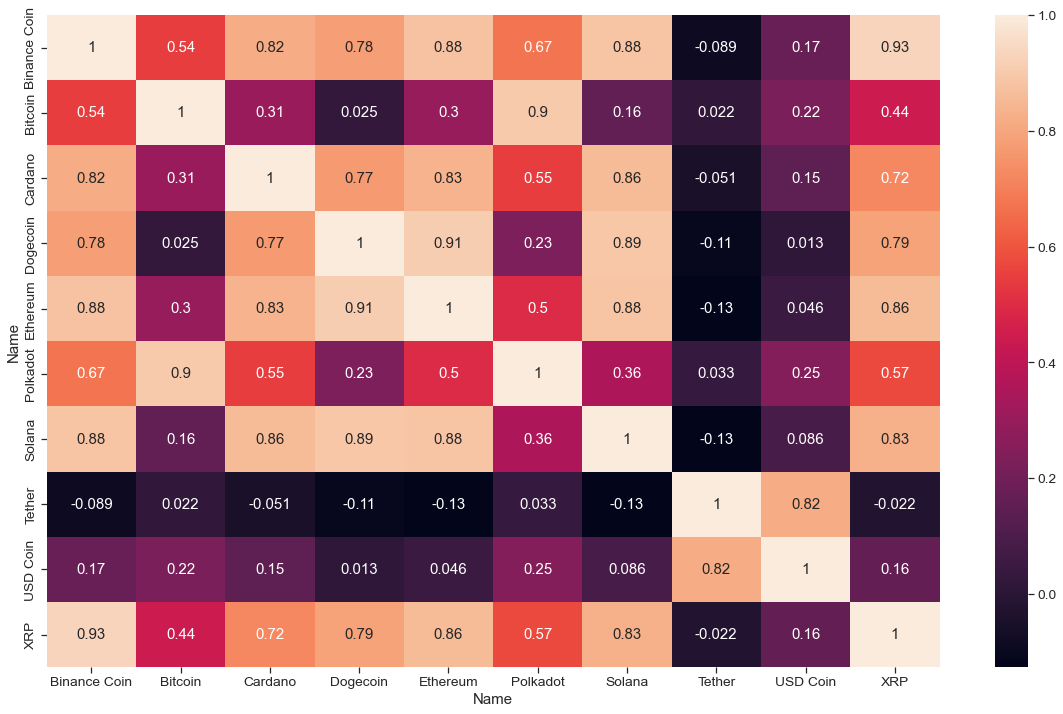

In [61]:
plt.figure(figsize=(20,12))

sns.heatmap(cross_tab_crypto.corr(),annot=True)

# Volatility analysis

In [62]:
# Volatility is one of the most important pillars in financial markets.
# A cryptocurrency or stock is said to have high volatility if its value can change dramatically within a short span of time.
# On other hand, lower volatility means that value of crypto tends to be relatively steady over a period of time. 
# These movements are due to several factors including demand and supply, 
# sentiment, corporate actions, greed, and fear, etc. 
# Mathematically, volatility is measured using a statistical measure called ‘standard deviation’,
# which measures an asset’s departure from its average value.
# We have already calculated the intraday returns (daily returns) of the 10 cryptos .
# Next, we will calculate the 7-day rolling mean(also called moving average) of the daily returns,
# then compute the standard deviation (which is square root of the variance) and plot the values.
# Relax, we don’t have to calculate all this manually; Pandas ‘rolling()’ function and ‘std()’ 
# function does the job for us in just one line!

<AxesSubplot:xlabel='Date'>

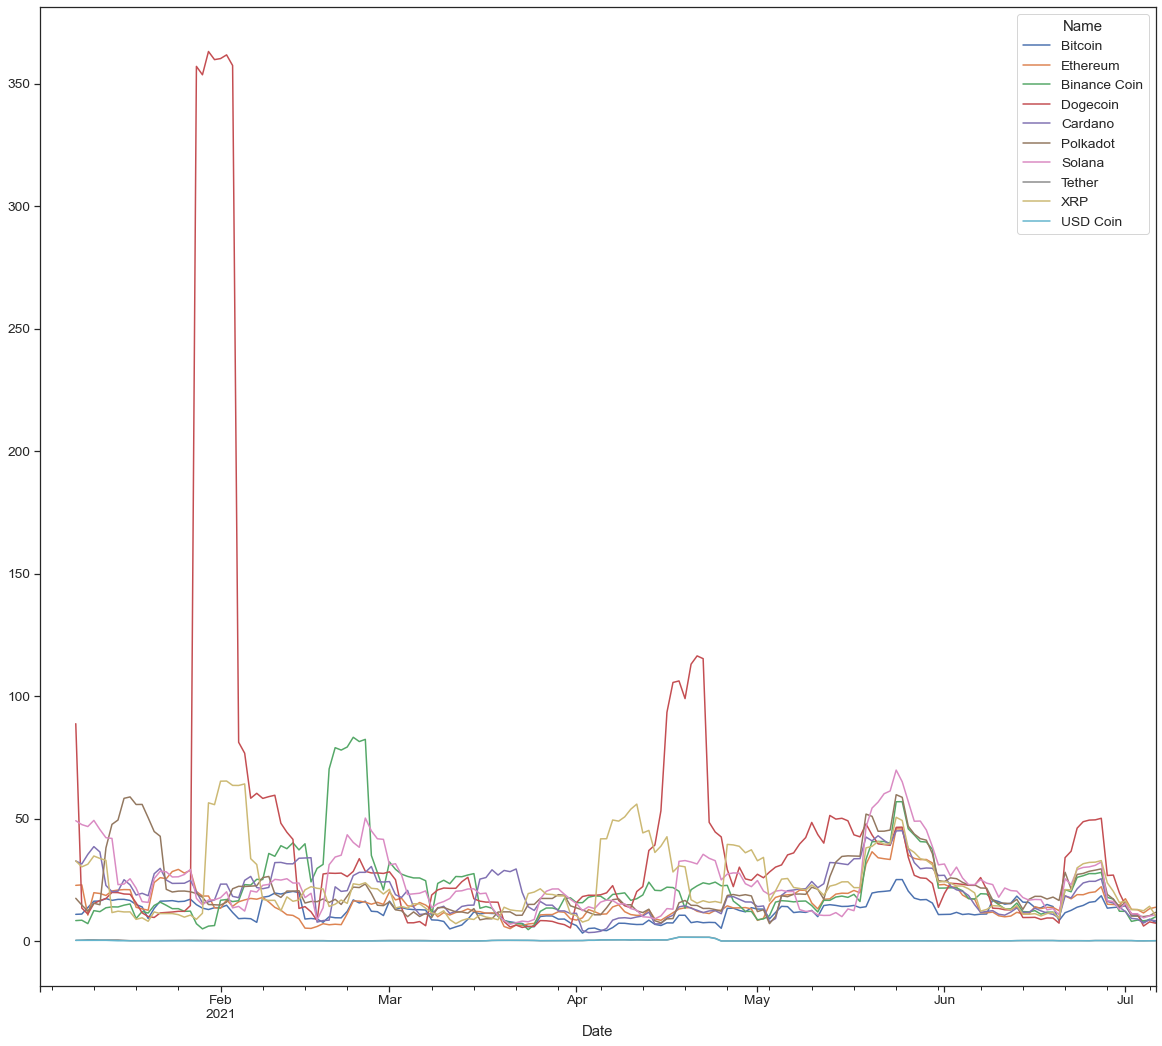

In [63]:
volatility = pct_chg_df[['Bitcoin', 'Ethereum', 'Binance Coin', 'Dogecoin', 'Cardano', 'Polkadot', 'Solana', 'Tether', 'XRP', 'USD Coin']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (20, 18))

#dogecoin seems to be most volatile followed by solana
#Tether -USDT AND USD coin are least volatile which is also because they are stable coins 
#Bitcoin seems to be the highest priced cryptocurrency but if compared to other cryptocurrencies its volatility is low 
#The low volatility of bitcoin can also be understood from its highest market capitalization and price similar to large cap
#stocks in share market 

# Many traders and investors seek out higher volatility investments in 
# order to make higher profits. 
# If a crypto price does not move, not only it has low volatility, 
# but also it has low gain potential.
# On the other hand, a crypto price or other security with a very high 
# volatility level can have tremendous profit potential, but the risk is equally high.

# Splitting to train and test

In [65]:
crypto_df['average'] = (crypto_df['Open'] + crypto_df['Close'])/ 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
crypto_df.head()

Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   

         Close  market_billion_usd$  volume_billion_usd$       average  
0  29374.15189                546.0            40.730301  29184.080405  
1  32127.26794                597.0            67.865421  30751.861885  
2  32782.02447                609.0            78.665235  32455.715915  
3  31971.91352                594.0            81.163475  32391.430580  
4  33992.42934                632.0            67.547325  32984.735235

In [79]:
features = ['Close','High','Low','Open']
target = 'average'

In [80]:
x_train, x_test, y_train, y_test = train_test_split(crypto_df[features],crypto_df[target],test_size=0.3)


In [81]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [82]:
score = model.score(x_test, y_test)
accuracy = score * 100
accuracy

100.0

In [83]:
data_for_predict = crypto_df.head(5)

prediction = model.predict(data_for_predict[features])

In [84]:
prediction

array([29184.080405, 30751.861885, 32455.715915, 32391.43058 ,
       32984.735235])

In [85]:
data_for_predict

Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   

         Close  market_billion_usd$  volume_billion_usd$       average  
0  29374.15189                546.0            40.730301  29184.080405  
1  32127.26794                597.0            67.865421  30751.861885  
2  32782.02447                609.0            78.665235  32455.715915  
3  31971.91352                594.0            81.163475  32391.430580  
4  33992.42934                632.0            67.547325  32984.735235

In [ ]:
[2231.3433, 3234.4]

In [ ]:
df = pd.Data

In [ ]:
l = [$1.00	$1.00	$0.999	$1.00	$4,146,328,235	$48,579,858,785]

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaler
scaler.mean_

In [92]:
ethereum_df['Trend'].value_counts()

Among top gainers      42
Among top losers       30
Bull run               27
Positive               19
Negative               19
Bear drop              17
Slight or No change    15
Slight Positive        11
Slight Negative         6
Name: Trend, dtype: int64

In [90]:
bitcoin_df

Name Symbol       Date         High          Low         Open  \
1    Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2    Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3    Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4    Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   
5    Bitcoin    BTC 2021-01-06  36879.69857  33514.03374  34013.61453   
..       ...    ...        ...          ...          ...          ...   
182  Bitcoin    BTC 2021-07-02  33939.58870  32770.68078  33549.60018   
183  Bitcoin    BTC 2021-07-03  34909.25990  33402.69654  33854.42136   
184  Bitcoin    BTC 2021-07-04  35937.56715  34396.47746  34665.56487   
185  Bitcoin    BTC 2021-07-05  35284.34443  33213.66103  35284.34443   
186  Bitcoin    BTC 2021-07-06  35038.53636  33599.91617  33723.50966   

           Close  market_billion_usd$  volume_billion_usd$  Day_Pct%_Change  \
1    32127.26794                597.0            67.865421         9.372581   
2    32782.02447                609.0            78.665235         2.038009   
3    31971.91352                594.0            81.163475        -2.471205   
4    33992.42934                632.0            67.547325         6.319659   
5    36824.36441                685.0            75.289434         8.331076   
..           ...                  ...                  ...              ...   
182  33897.04859                635.0            38.728975         0.967860   
183  34668.54840                650.0            24.383959         2.276009   
184  35287.77977                662.0            24.924308         1.786147   
185  33746.00246                633.0            26.721554        -4.369154   
186  34235.19345                642.0            26.501260         1.449626   

                 Trend  
1             Bull run  
2             Positive  
3             Negative  
4    Among top gainers  
5             Bull run  
..                 ...  
182    Slight Positive  
183           Positive  
184           Positive  
185   Among top losers  
186           Positive  

[186 rows x 11 columns]

In [91]:
ethereum_df

Name Symbol       Date         High          Low         Open  \
1    Ethereum    ETH 2021-01-02   786.798458   718.109518   730.402673   
2    Ethereum    ETH 2021-01-03  1006.565002   771.561646   774.511865   
3    Ethereum    ETH 2021-01-04  1153.189232   912.305338   977.058819   
4    Ethereum    ETH 2021-01-05  1129.371488   986.811283  1041.498831   
5    Ethereum    ETH 2021-01-06  1209.428548  1064.233351  1101.004976   
..        ...    ...        ...          ...          ...          ...   
182  Ethereum    ETH 2021-07-02  2155.596496  2021.824808  2109.892677   
183  Ethereum    ETH 2021-07-03  2237.567155  2117.590013  2150.835025   
184  Ethereum    ETH 2021-07-04  2384.286857  2190.837703  2226.550382   
185  Ethereum    ETH 2021-07-05  2321.922836  2163.041394  2321.922836   
186  Ethereum    ETH 2021-07-06  2346.294874  2197.919385  2197.919385   

           Close  market_billion_usd$  volume_billion_usd$  Day_Pct%_Change  \
1     774.534968            88.367613            19.740771         6.047284   
2     975.507673           111.310000            45.200463        25.947532   
3    1040.233048           118.710000            56.945986         6.635045   
4    1100.006099           125.546000            41.535933         5.746121   
5    1207.112234           137.786000            44.699914         9.736867   
..           ...                  ...                  ...              ...   
182  2150.040364           250.553000            31.796213         1.723824   
183  2226.114282           259.448000            17.433362         3.538255   
184  2321.724112           270.622000            18.787107         4.294920   
185  2198.582464           256.298000            20.103795        -5.303888   
186  2324.679449           271.029000            20.891861         5.735377   

                 Trend  
1    Among top gainers  
2             Bull run  
3    Among top gainers  
4    Among top gainers  
5             Bull run  
..                 ...  
182           Positive  
183  Among top gainers  
184  Among top gainers  
185   Among top losers  
186  Among top gainers  

[186 rows x 11 columns]